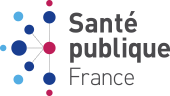

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

# Contexte
L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.


# Partie 2 - Objectif 
* Analyses exploratoires
* Tests hypothèses
* Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.


In [2]:
df = pd.read_csv('openfoodfacts.csv', sep=',') 

In [3]:
df.head(3)

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  saturated-fat_100g  \
0     0.030        0.085     0.025508               0.085               0.020   
1     0.000        0.097     0.009572               0.100               0.000   
2     0.008        0.560     0.073690               0.760               0.001   

   fiber_100g  proteins_100g  salt_100g            pnns_groups_1  \
0       0.000          0.130     0.0200  Milk and dairy products   
1       0.000          0.005     0.0003                Beverages   
2       0.048          0.008     0.0005            Sugary snacks   

                                        product_name nutrition_grade_fr  
0    Bridelight 3% Les carrés fondants goût Emmental                  C  
1                                100 % Pur Jus Pomme                  C  
2                                  18 marrons glacés                  C

In [4]:
df.describe()

fat_100g   sugars_100g   energy_100g  carbohydrates_100g  \
count  42114.000000  42114.000000  42114.000000        42114.000000   
mean       0.125874      0.134597      0.059792            0.286437   
std        0.153566      0.186482      0.042165            0.267037   
min        0.000000      0.000000      0.000000            0.000000   
25%        0.015000      0.011000      0.023369            0.051000   
50%        0.067667      0.044000      0.055080            0.168000   
75%        0.200000      0.181000      0.088810            0.539000   
max        1.000000      1.000000      1.000000            1.000000   

       saturated-fat_100g    fiber_100g  proteins_100g     salt_100g  
count        42114.000000  42114.000000   42114.000000  42114.000000  
mean             0.055017      0.018192       0.078297      0.010043  
std              0.084955      0.039959       0.077698      0.029685  
min              0.000000      0.000000       0.000000      0.000000  
25%              0.003000      0.000000       0.020000      0.000800  
50%              0.020000      0.000010       0.061000      0.005500  
75%              0.075000      0.023000       0.110000      0.012000  
max              1.000000      1.000000       1.000000      1.000000

In [5]:
df.columns

Index(['fat_100g', 'sugars_100g', 'energy_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'pnns_groups_1', 'product_name', 'nutrition_grade_fr'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42114 entries, 0 to 42113
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fat_100g            42114 non-null  float64
 1   sugars_100g         42114 non-null  float64
 2   energy_100g         42114 non-null  float64
 3   carbohydrates_100g  42114 non-null  float64
 4   saturated-fat_100g  42114 non-null  float64
 5   fiber_100g          42114 non-null  float64
 6   proteins_100g       42114 non-null  float64
 7   salt_100g           42114 non-null  float64
 8   pnns_groups_1       42114 non-null  object 
 9   product_name        42114 non-null  object 
 10  nutrition_grade_fr  42114 non-null  object 
dtypes: float64(8), object(3)
memory usage: 3.5+ MB


# Analyse Univariée


In [7]:
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as st

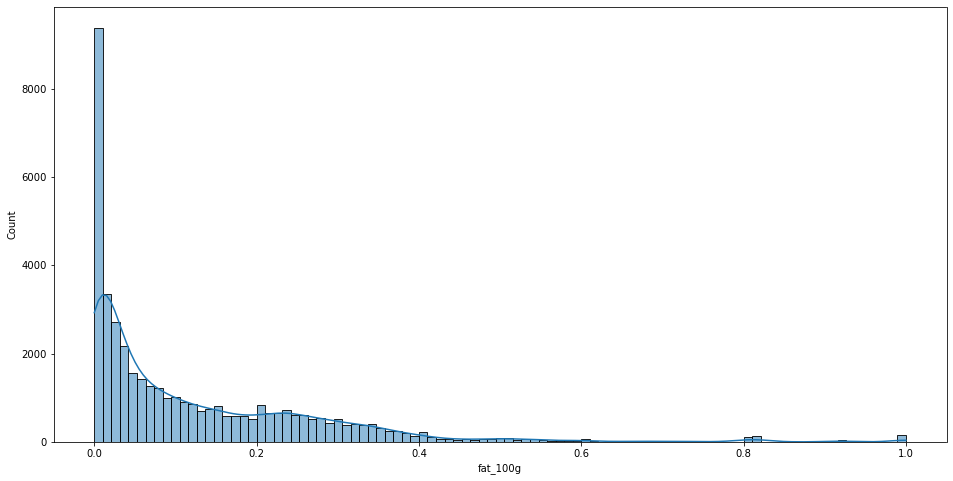

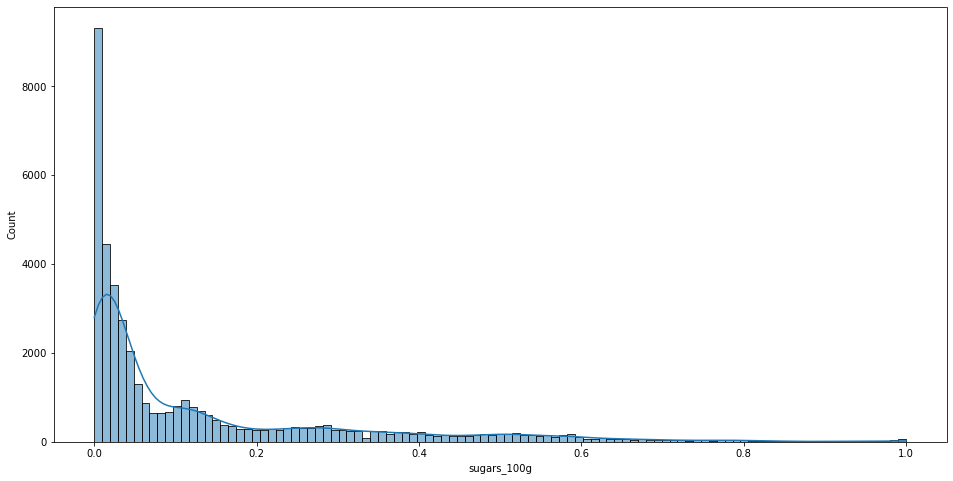

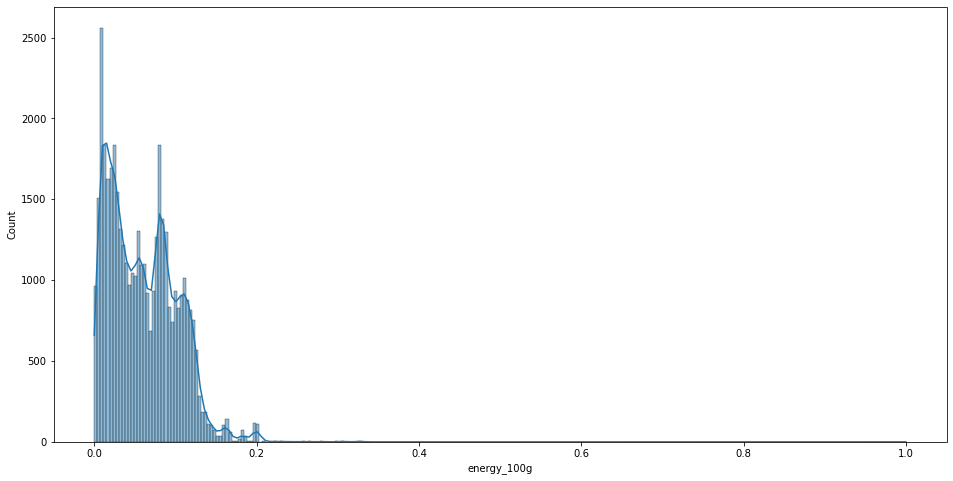

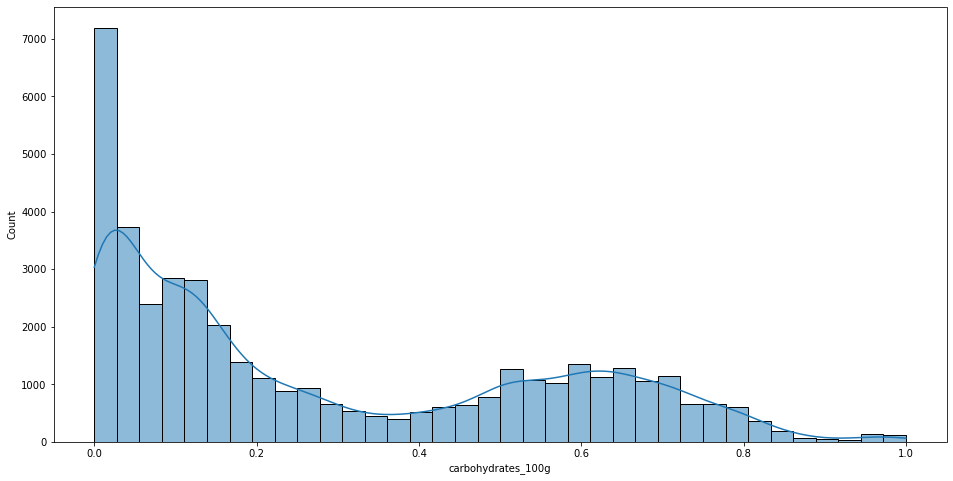

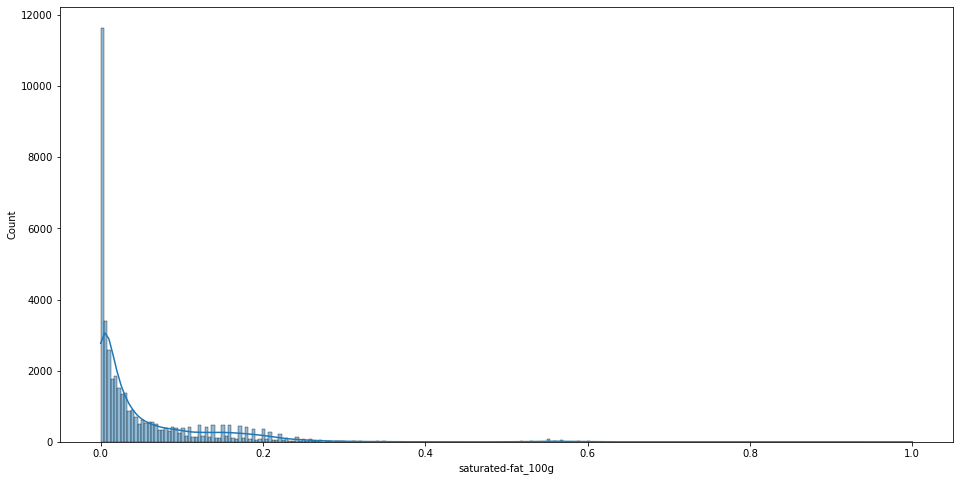

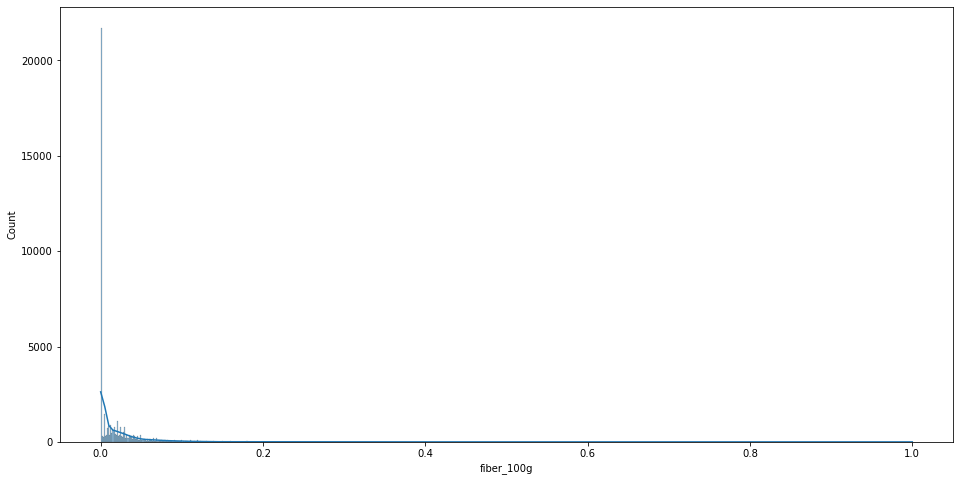

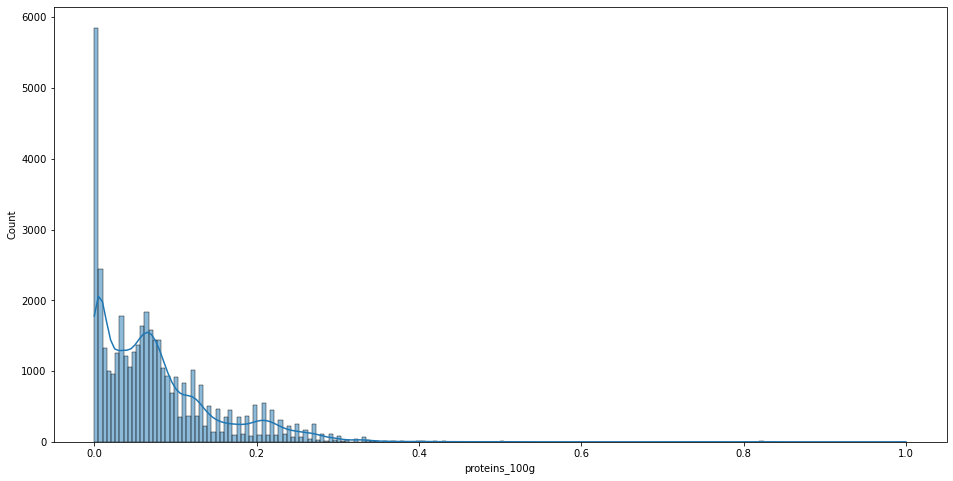

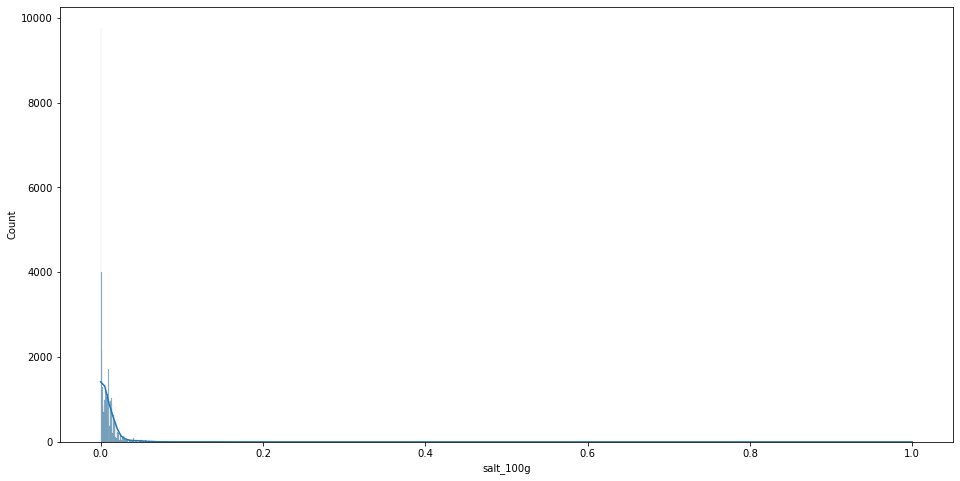

In [8]:
#distplot
for col in df.select_dtypes('float'):
    fig = plt.figure(figsize=(16, 8))
    sns.histplot(x=col, data=df[[col]], kde=True)
    plt.show()

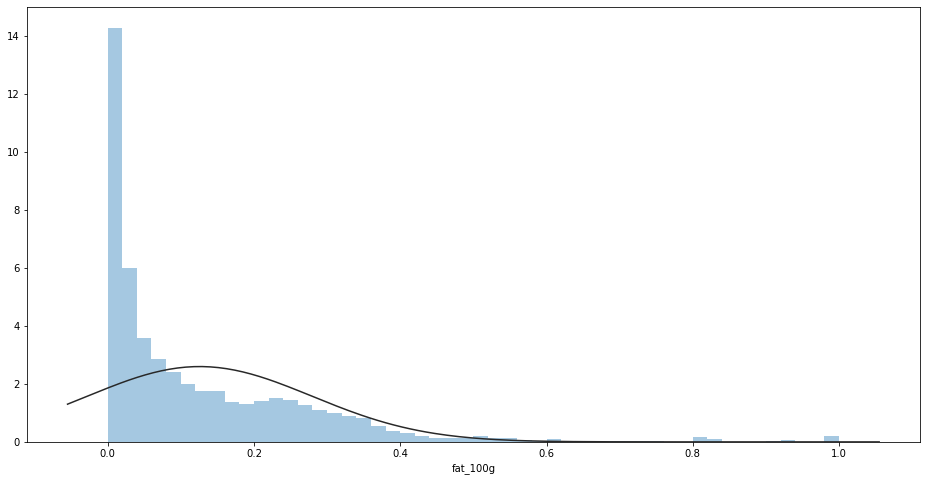

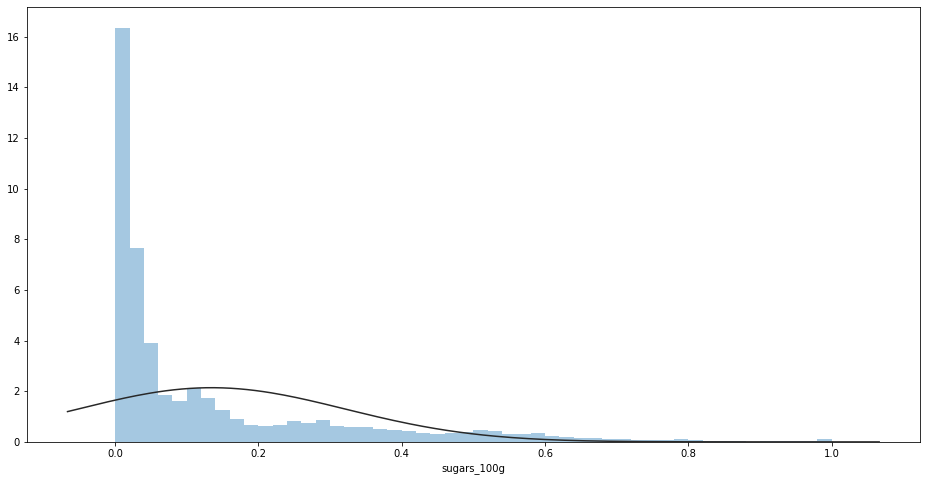

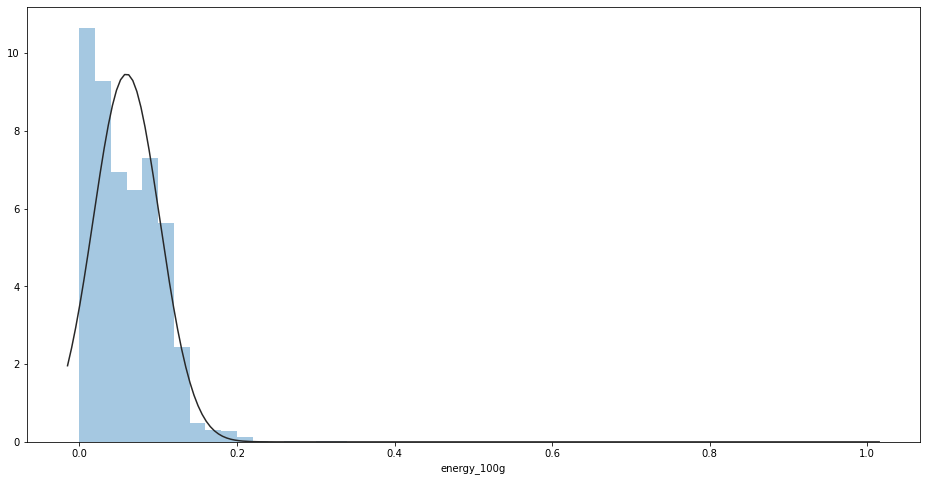

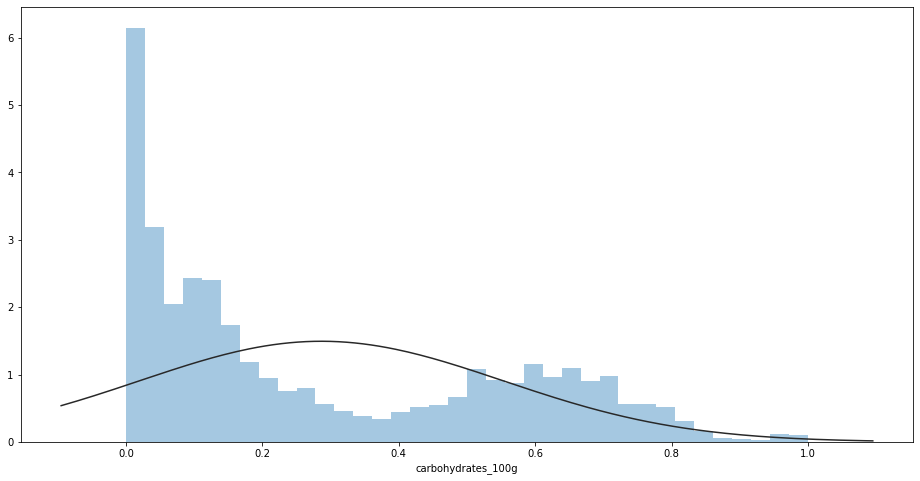

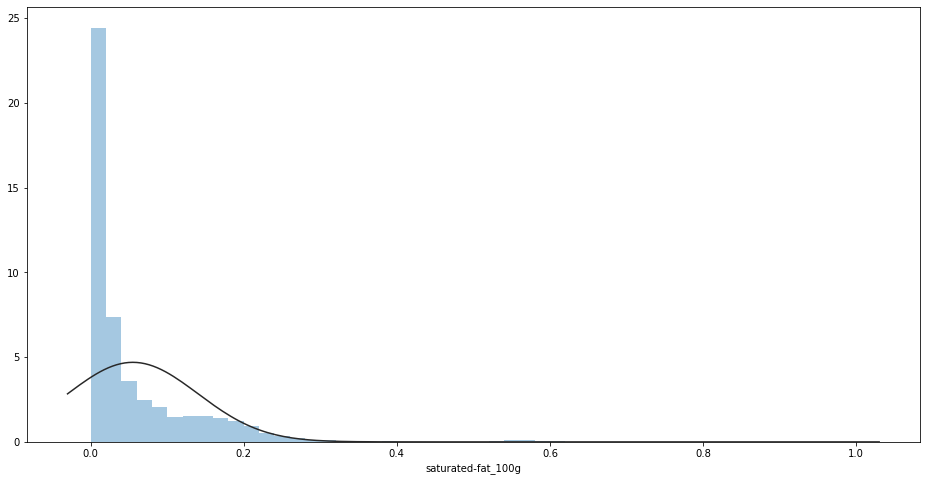

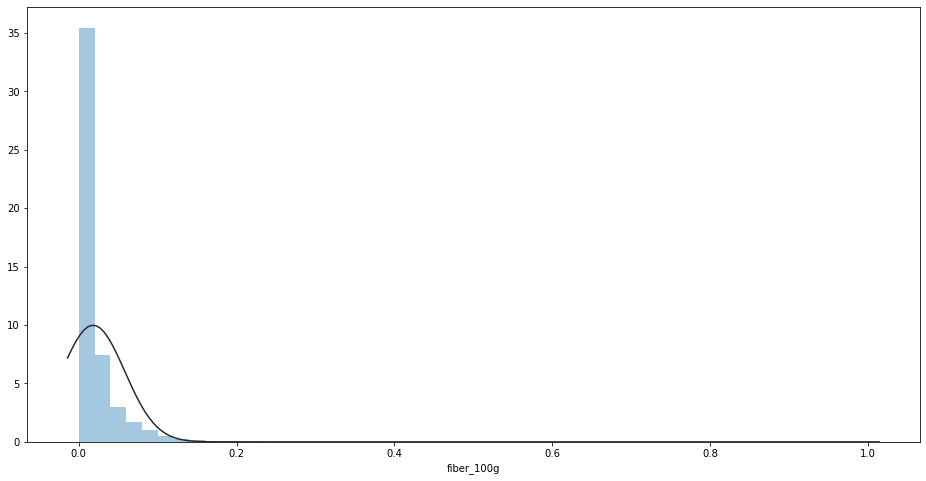

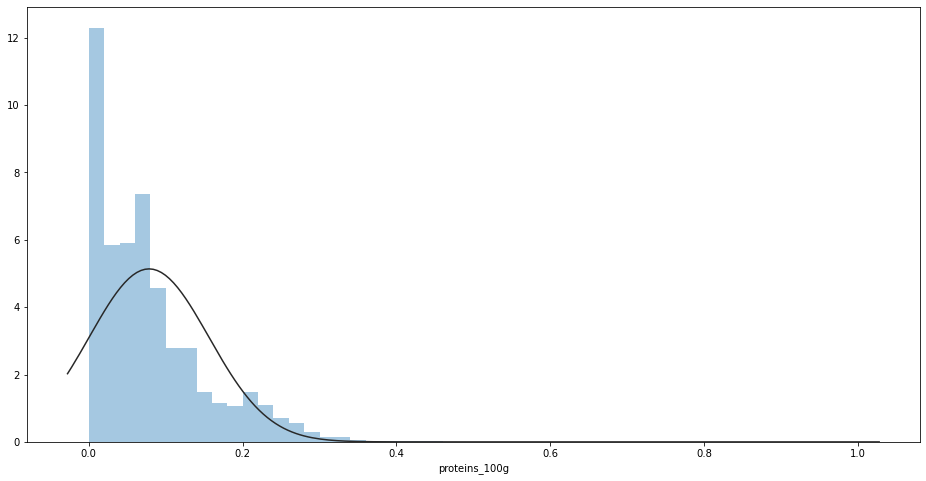

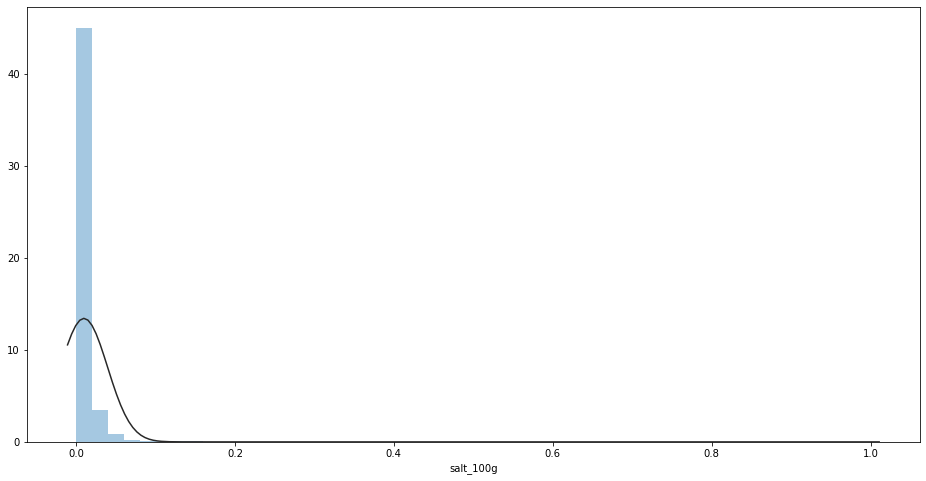

In [9]:
#distplot
for col in df.select_dtypes('float'):
    fig = plt.figure(figsize=(16, 8))
    sns.distplot(df[col], fit=norm, kde=False)
    plt.show()

In [10]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df.select_dtypes('number'):
    w, pvalue = st.shapiro(df[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

fat_100g-------------------------------------------------------------- 0.7715361714363098 0.0
On rejette H0 : la distribution ne suit pas une loi normale
sugars_100g----------------------------------------------------------- 0.7296185493469238 0.0
On rejette H0 : la distribution ne suit pas une loi normale
energy_100g----------------------------------------------------------- 0.9289897084236145 0.0
On rejette H0 : la distribution ne suit pas une loi normale
carbohydrates_100g---------------------------------------------------- 0.8707199096679688 0.0
On rejette H0 : la distribution ne suit pas une loi normale
saturated-fat_100g---------------------------------------------------- 0.6475089192390442 0.0
On rejette H0 : la distribution ne suit pas une loi normale
fiber_100g------------------------------------------------------------ 0.4572502374649048 0.0
On rejette H0 : la distribution ne suit pas une loi normale
proteins_100g--------------------------------------------------------- 0.824

fat_100g


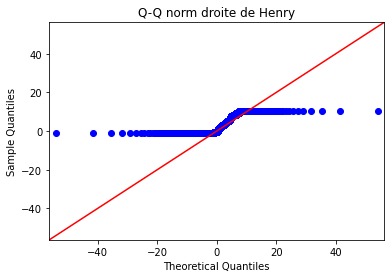

sugars_100g


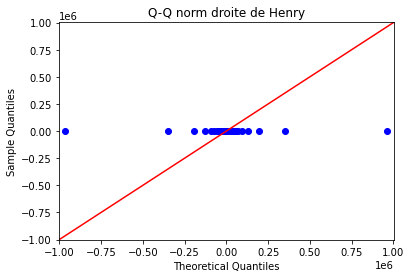

energy_100g


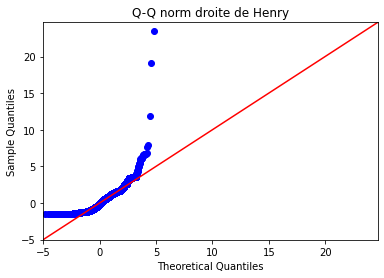

carbohydrates_100g


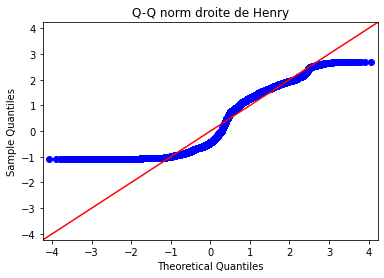

saturated-fat_100g


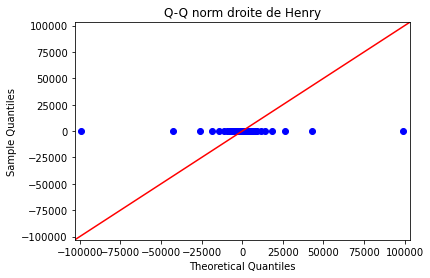

fiber_100g


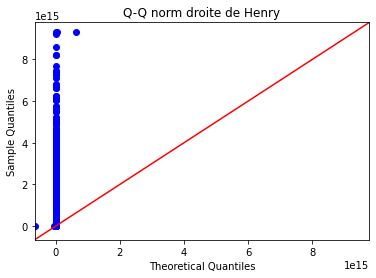

proteins_100g


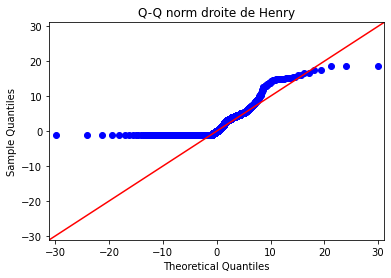

salt_100g


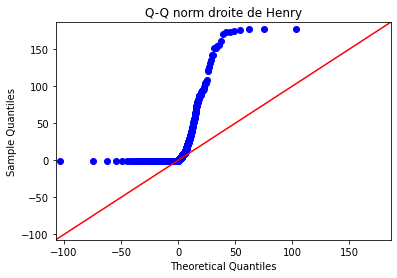

In [11]:
#qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('number'):
    sm.qqplot(df[col],stats.t, fit=True, line="45")
    plt.title("Q-Q norm droite de Henry")
    print(col)
    plt.show()

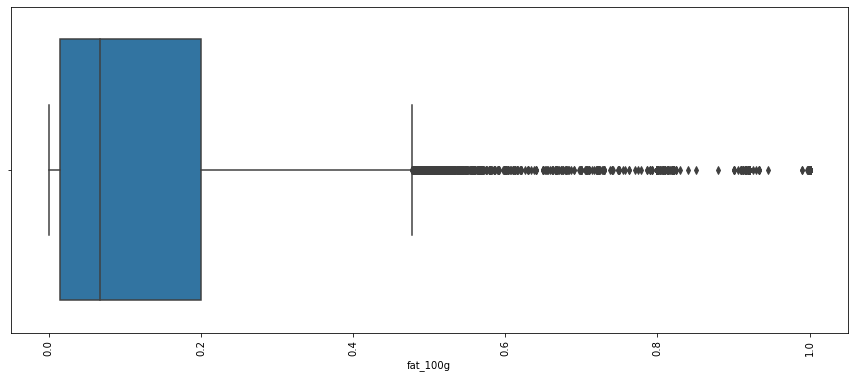

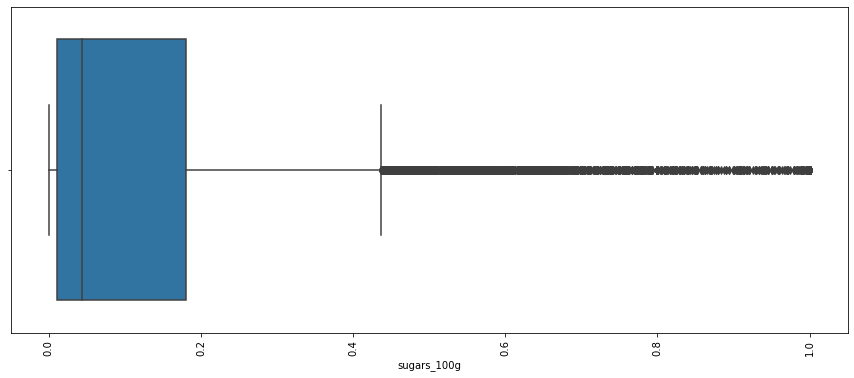

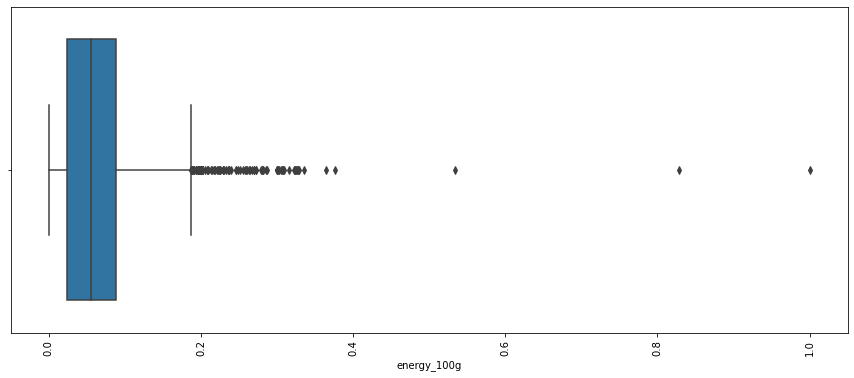

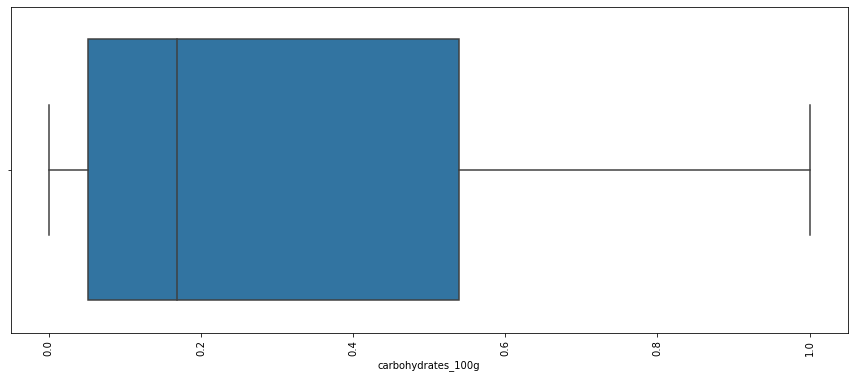

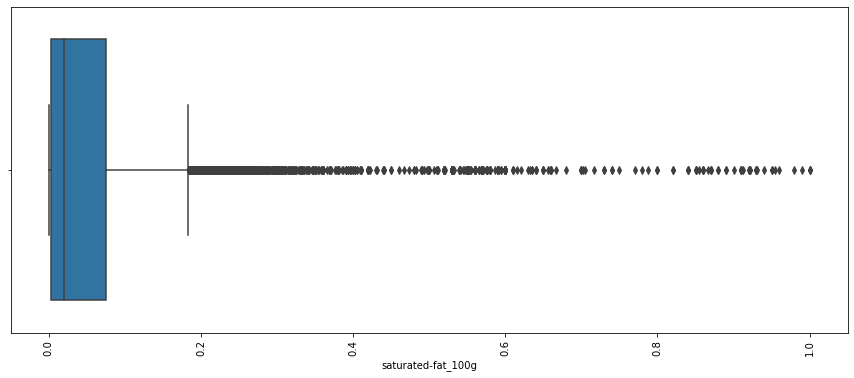

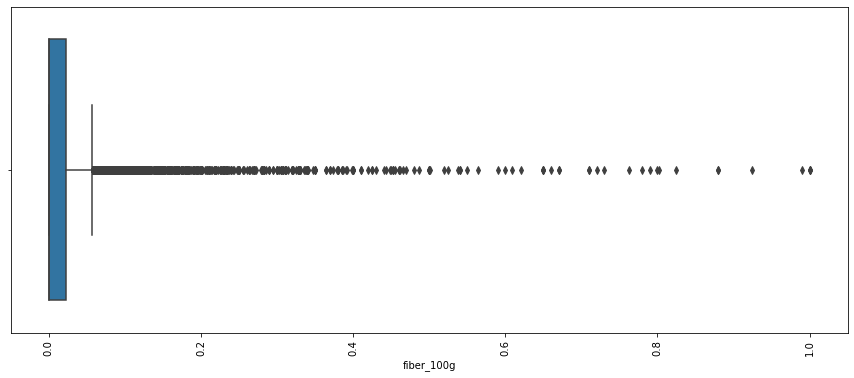

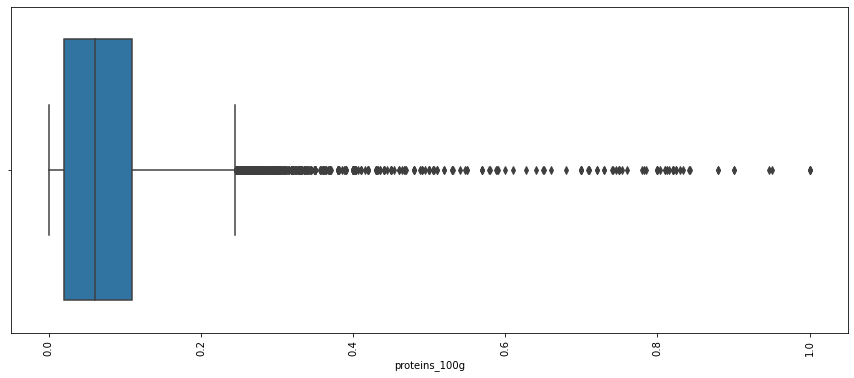

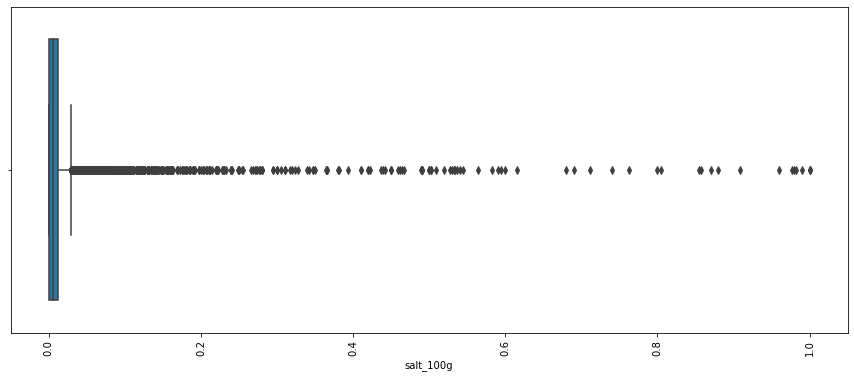

In [12]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(15,6))
    sns.boxplot(df[col])
    plt.xticks(rotation=90)
    plt.show()

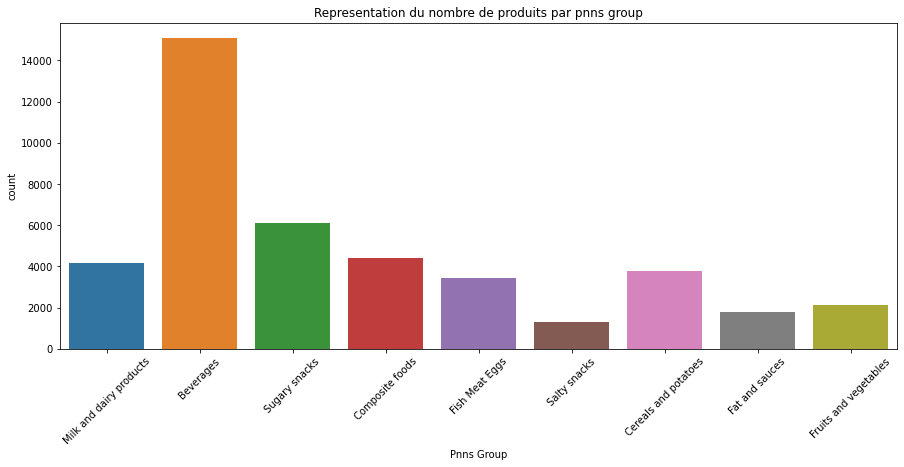

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x="pnns_groups_1",data=df)
plt.title('Representation du nombre de produits par pnns group')
plt.xlabel('Pnns Group')
plt.xticks(rotation=45)
plt.show()

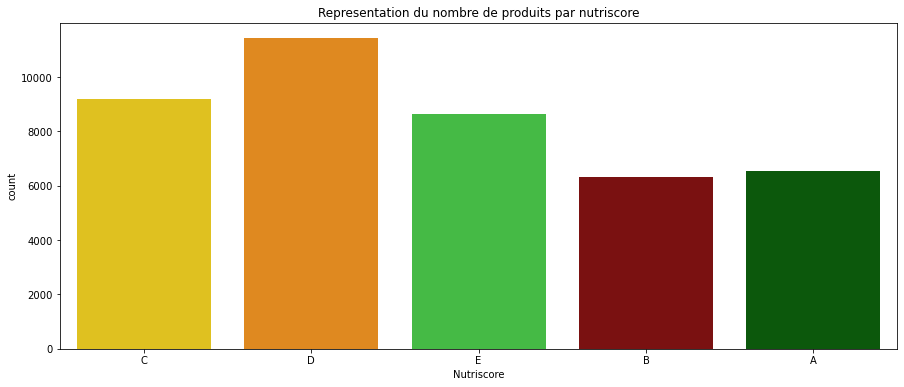

In [14]:
# Representation du nombre de produits par nutriscore
colors = ['gold', 'darkorange','limegreen', 'darkred','darkgreen']
plt.figure(figsize=(15,6))
sns.countplot(x="nutrition_grade_fr",data=df, palette=colors)
plt.title('Representation du nombre de produits par nutriscore')
plt.xlabel('Nutriscore')
plt.show()

# Analyse Bivariée

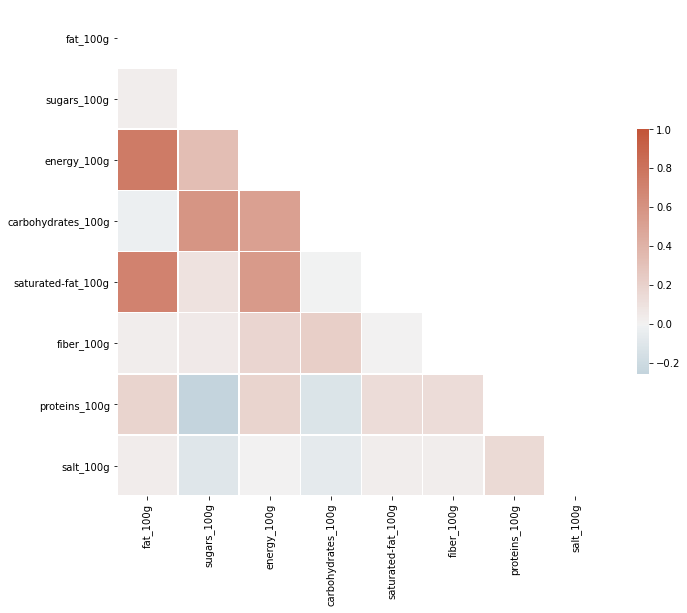

In [15]:
# Compute the correlation matrix
corr = df[['fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

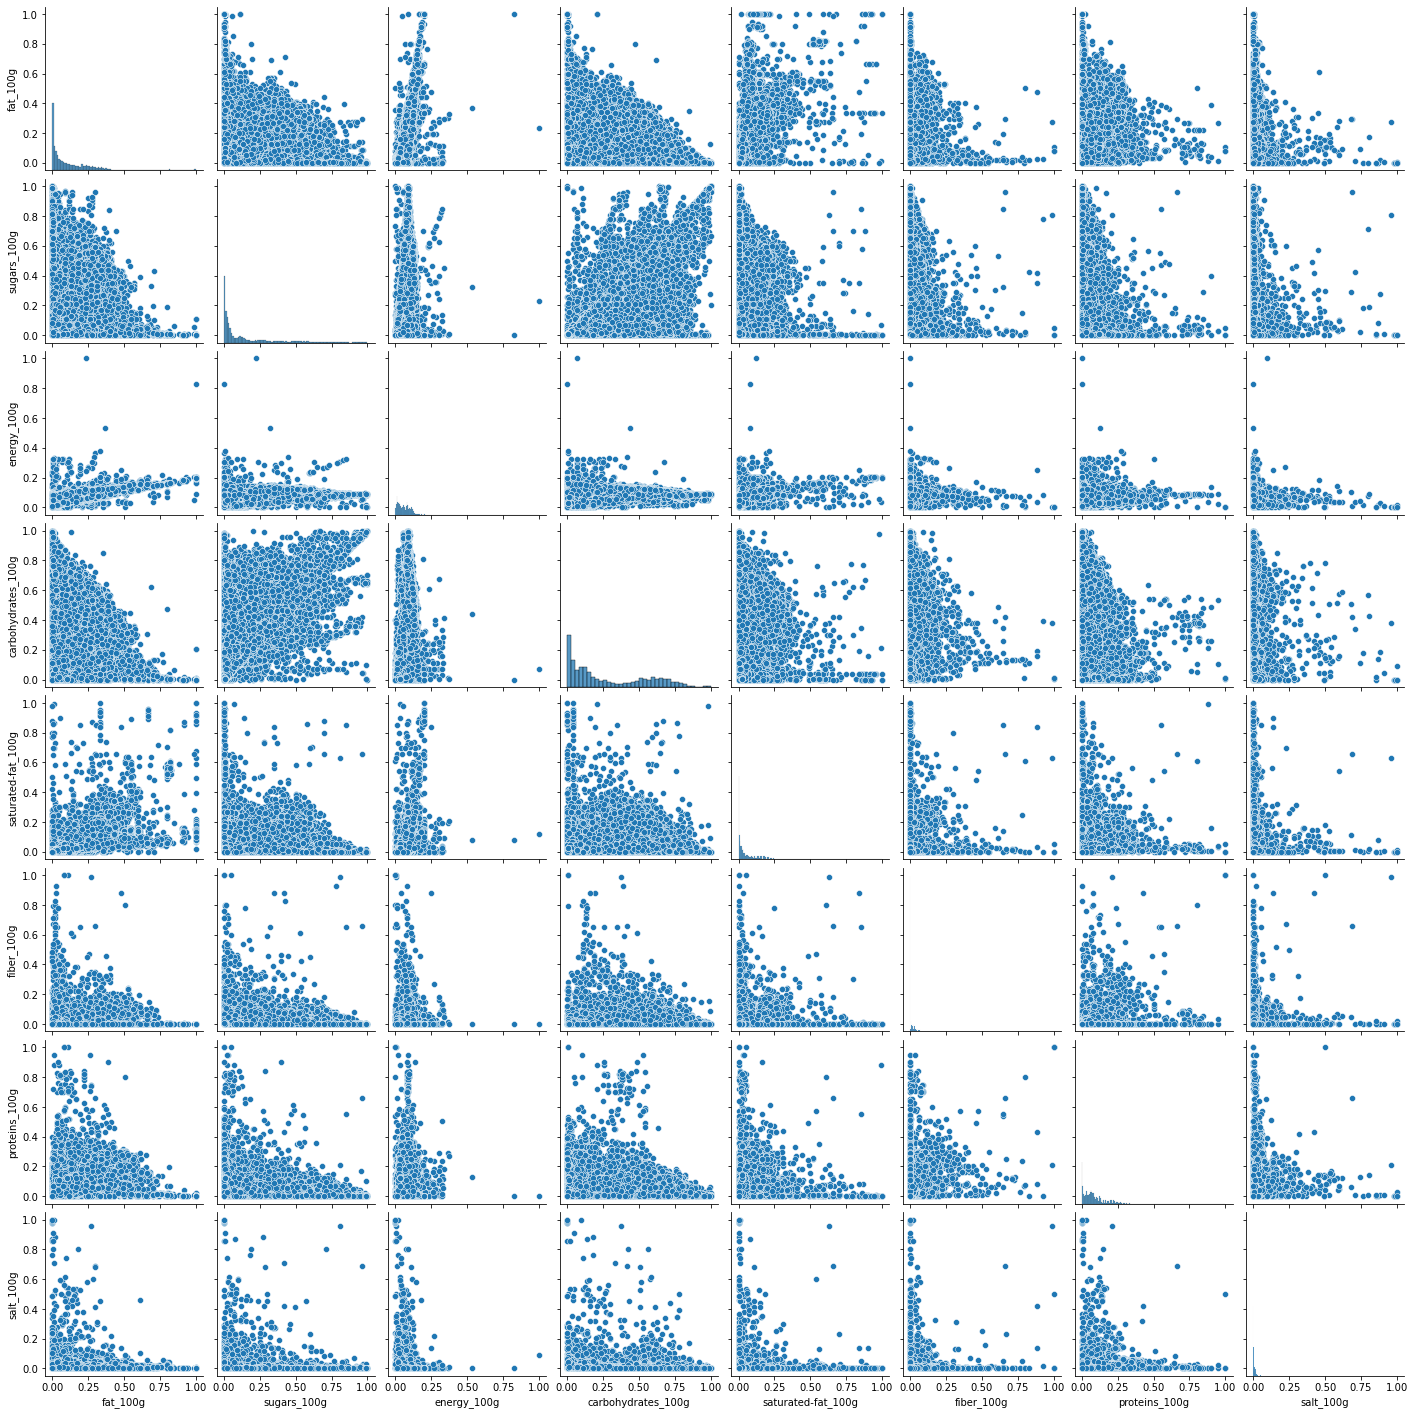

In [16]:
sns.pairplot(df)

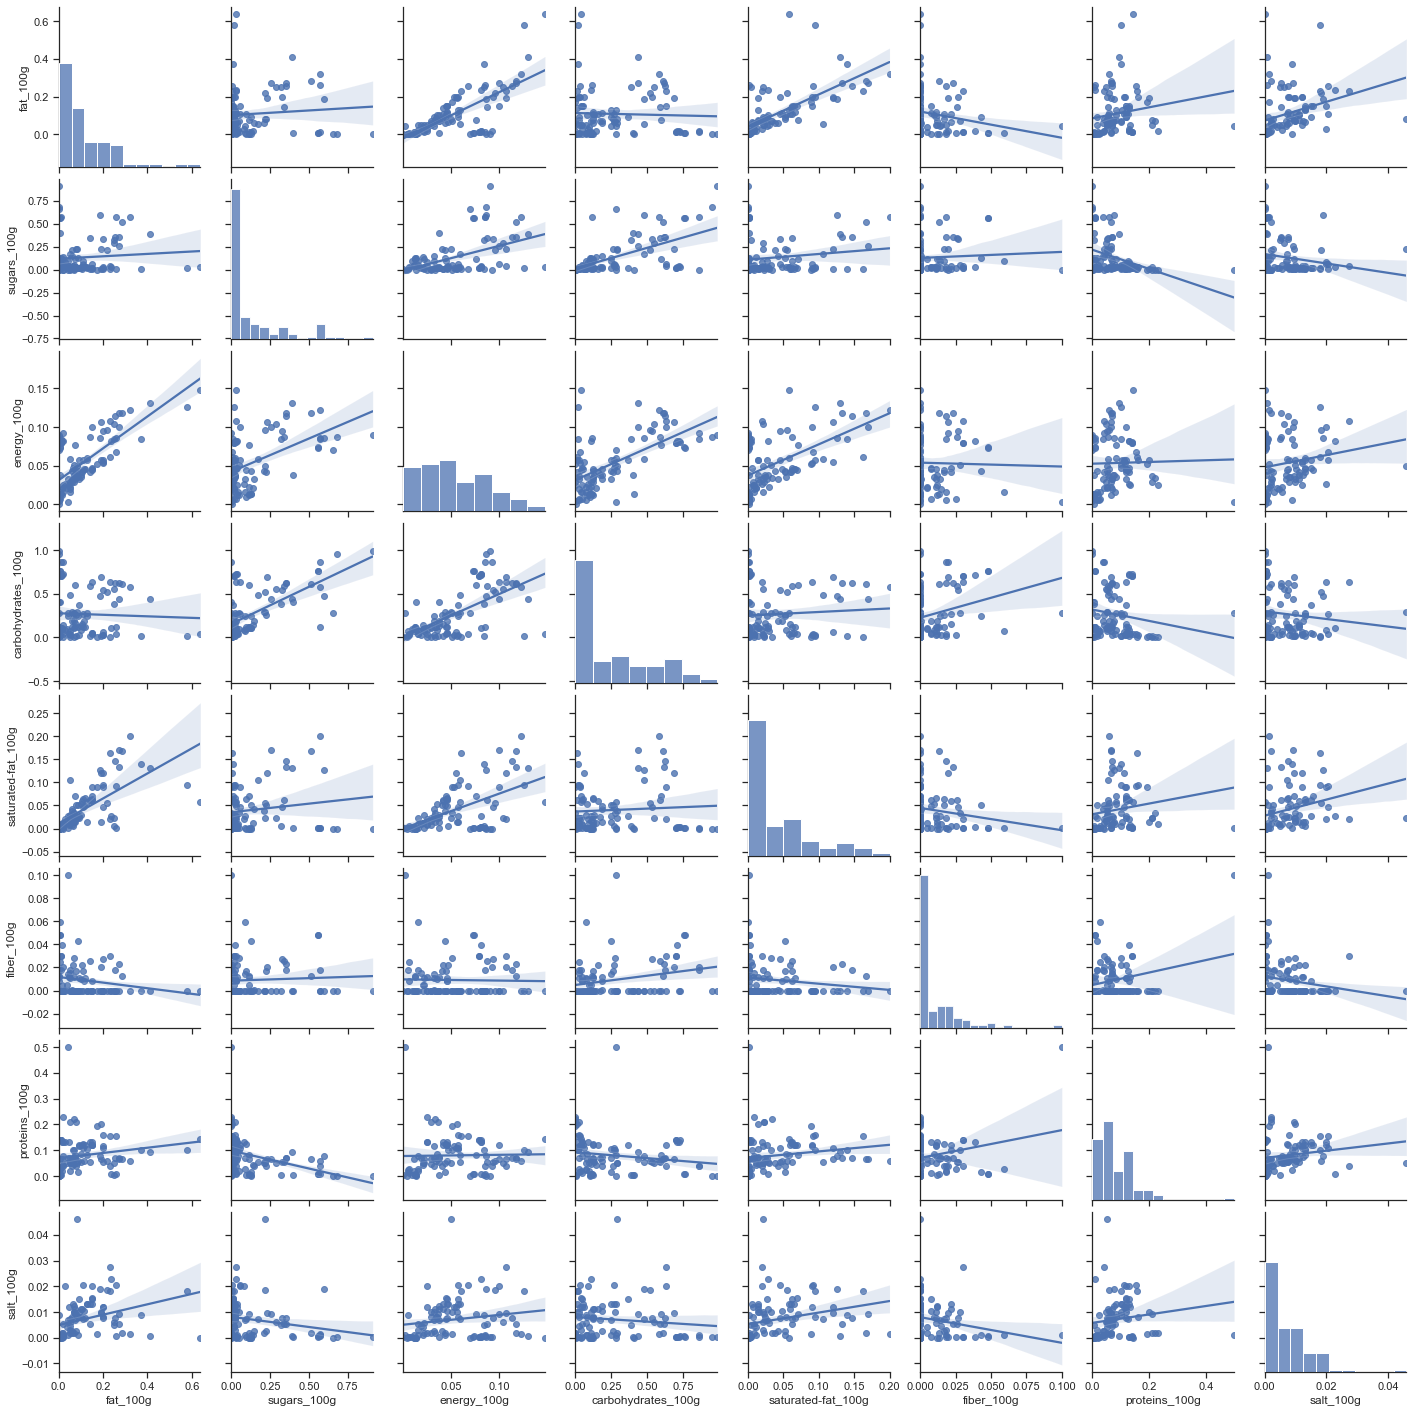

In [17]:
# Make a paiwise scatter plot.
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[:100], kind="reg") # To save time, consider 100 rows only.
plt.show()

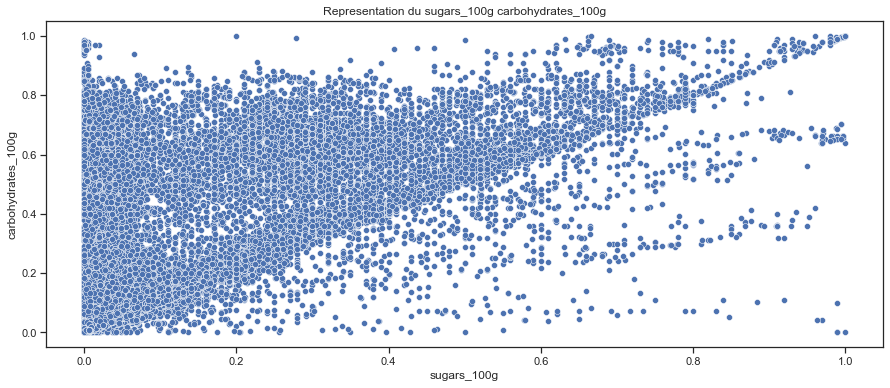

In [18]:
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=df, 
    x='sugars_100g', 
    y='carbohydrates_100g')

plt.title('Representation du sugars_100g carbohydrates_100g')
plt.xlabel('sugars_100g')
plt.ylabel('carbohydrates_100g')
plt.show()

In [19]:
# les moyennes des nutrition_grade par features
df_gb = df.groupby(["nutrition_grade_fr"]).mean()
df_gb

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
nutrition_grade_fr                                                           
A                   0.030678     0.040278     0.039700            0.281296   
B                   0.039260     0.048512     0.028559            0.174968   
C                   0.082434     0.103587     0.045153            0.237401   
D                   0.171426     0.177412     0.073489            0.319996   
E                   0.247277     0.245336     0.095330            0.379844   

                    saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  
nutrition_grade_fr                                                            
A                             0.006339    0.037611       0.080579   0.003384  
B                             0.010816    0.012512       0.057679   0.005179  
C                             0.022802    0.018029       0.068284   0.009552  
D                             0.071276    0.015121       0.090813   0.013814  
E                             0.136986    0.011923       0.085789   0.014171

## Fat_100g
### Nuriscore

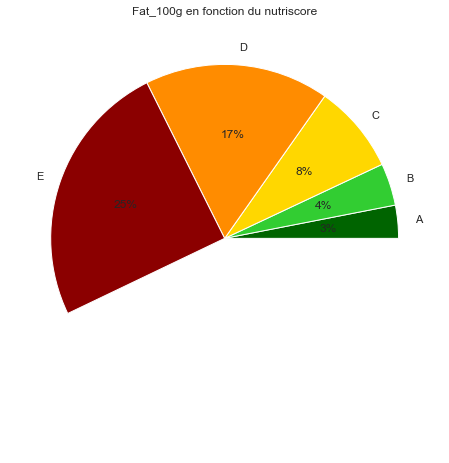

In [20]:
# declaring data
data = df_gb['fat_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Fat_100g en fonction du nutriscore')  
# displaying chart
plt.show()

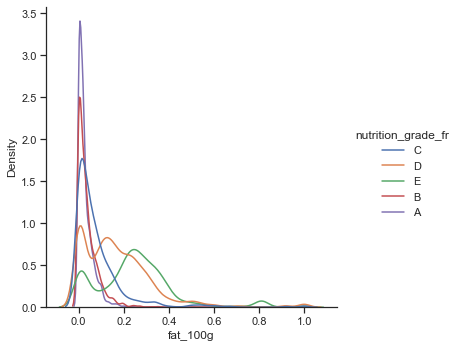

In [21]:
sns.displot(data=df, x="fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

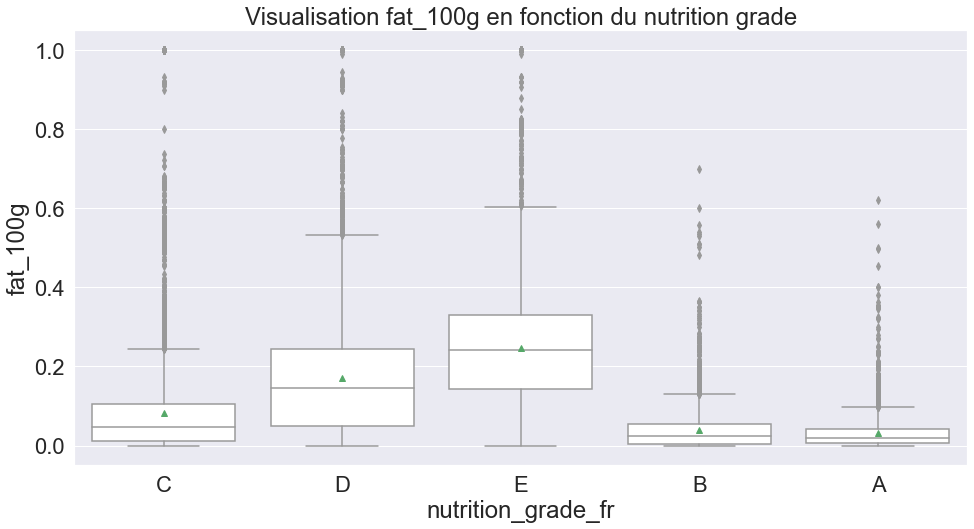

In [22]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fat_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

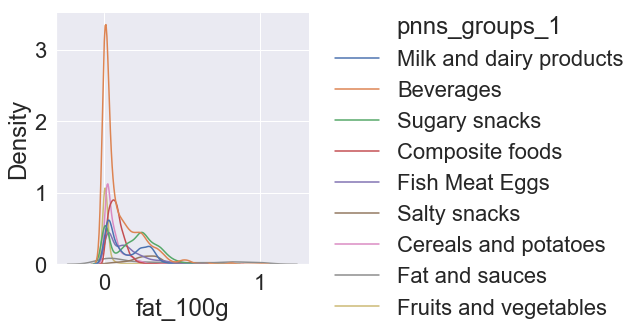

In [23]:
sns.displot(data=df, x="fat_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

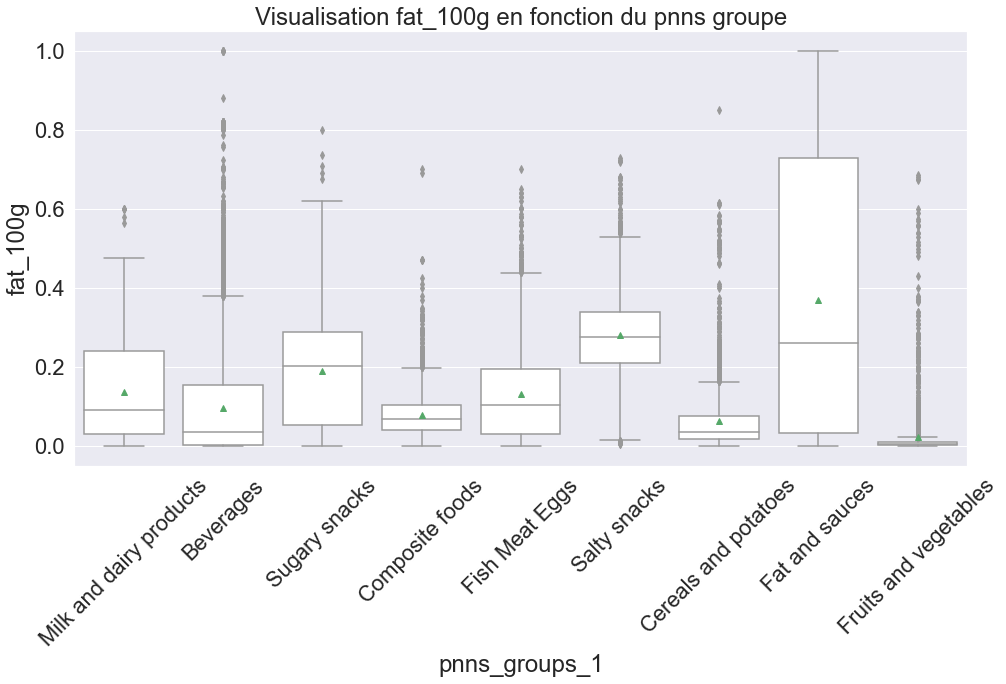

In [24]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fat_100g en fonction du pnns groupe")
plt.xticks(rotation=45)
plt.show()

## Sugars_100g
### Nutriscore

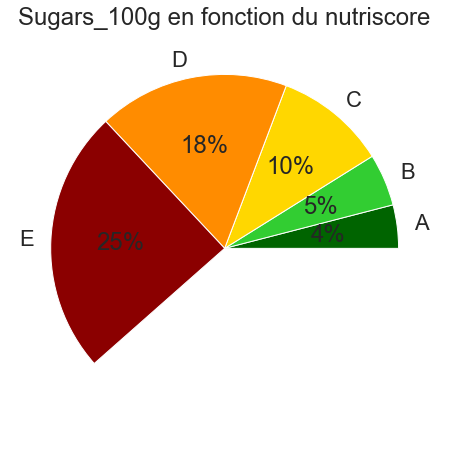

In [25]:
# declaring data
data = df_gb['sugars_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Sugars_100g en fonction du nutriscore')  
# displaying chart
plt.show()

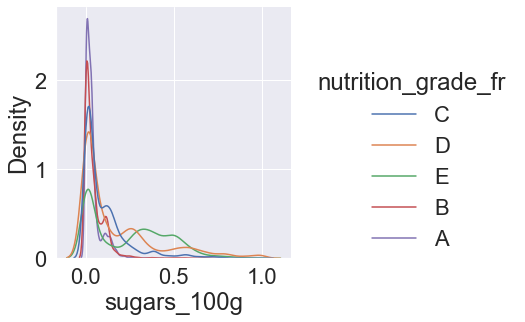

In [26]:
sns.displot(data=df, x="sugars_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

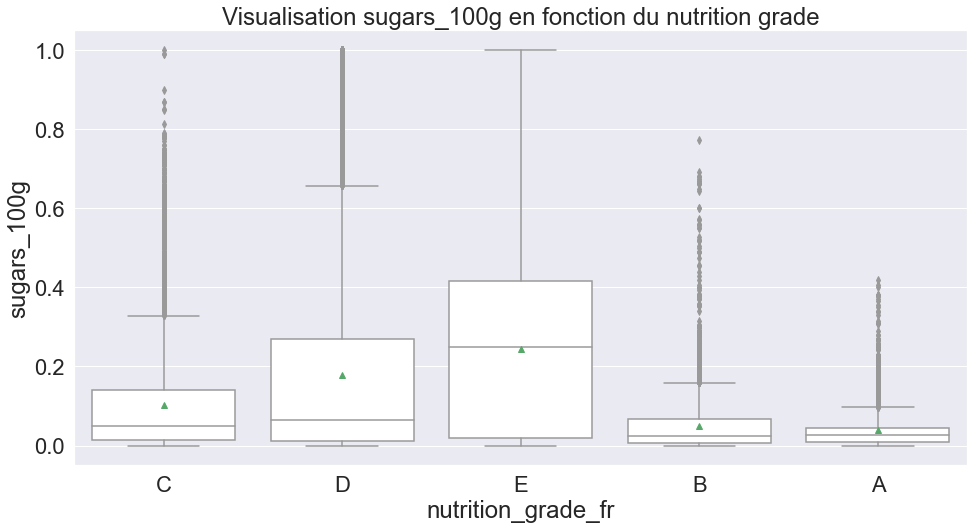

In [27]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="sugars_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation sugars_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

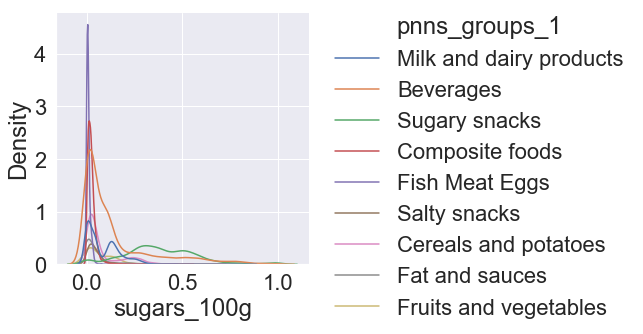

In [28]:
sns.displot(data=df, x="sugars_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

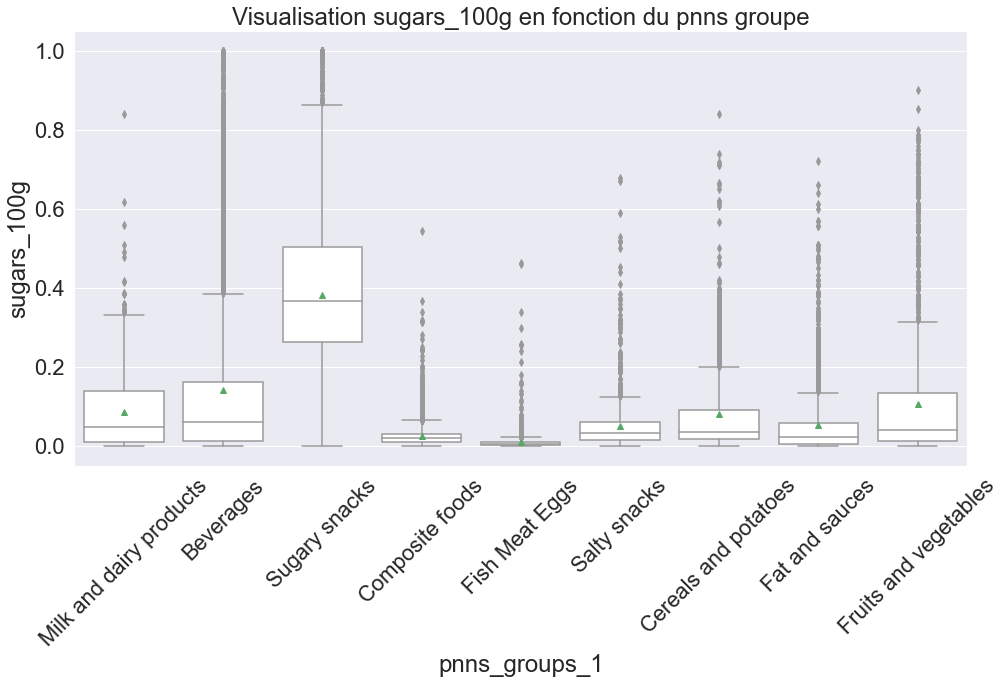

In [29]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="sugars_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation sugars_100g en fonction du pnns groupe")
plt.xticks(rotation=45)
plt.show()

## Energy_100g
### Nutriscore

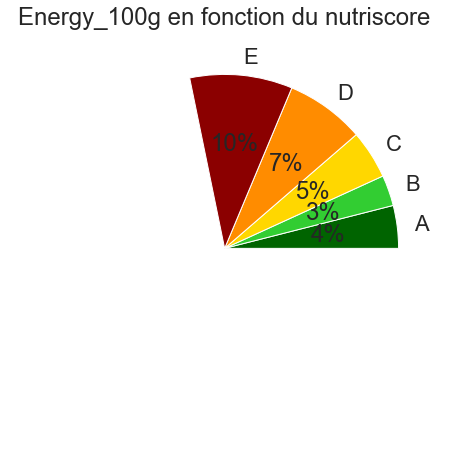

In [30]:
# declaring data
data = df_gb['energy_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Energy_100g en fonction du nutriscore')  
# displaying chart
plt.show()

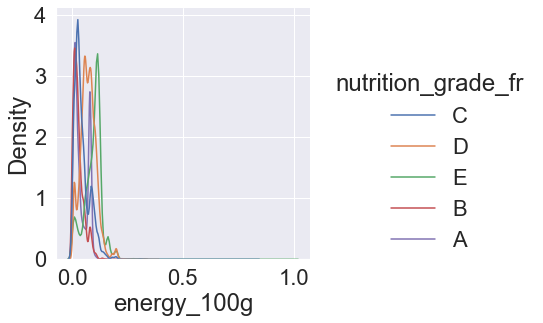

In [31]:
sns.displot(data=df, x="energy_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

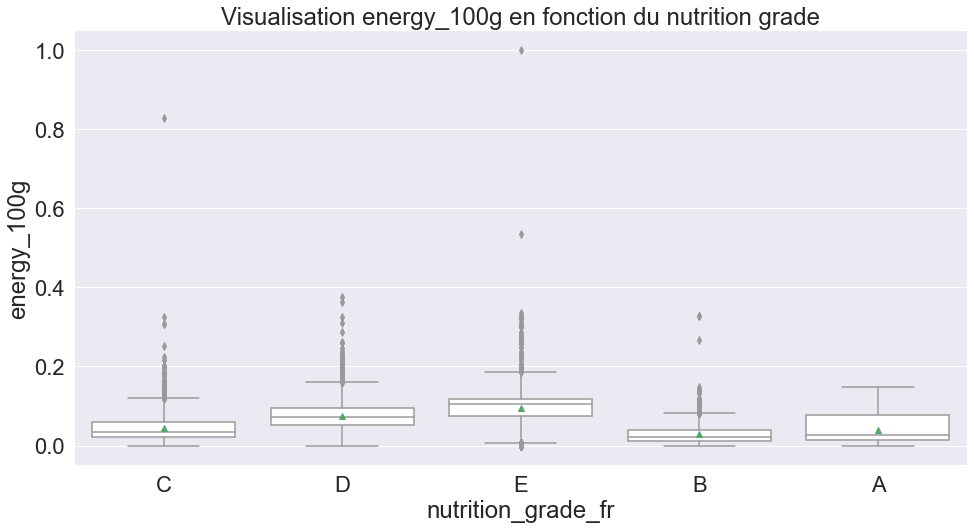

In [32]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation energy_100g en fonction du nutrition grade")
plt.show()

### Pnns Groupe

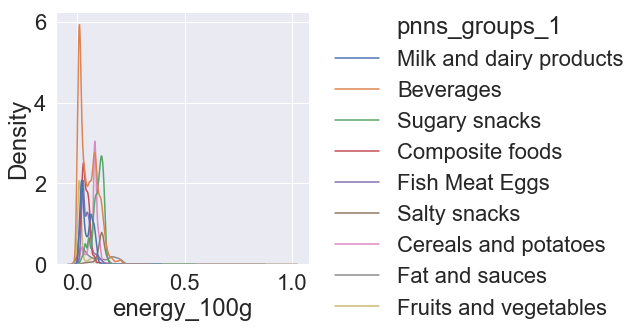

In [33]:
sns.displot(data=df, x="energy_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

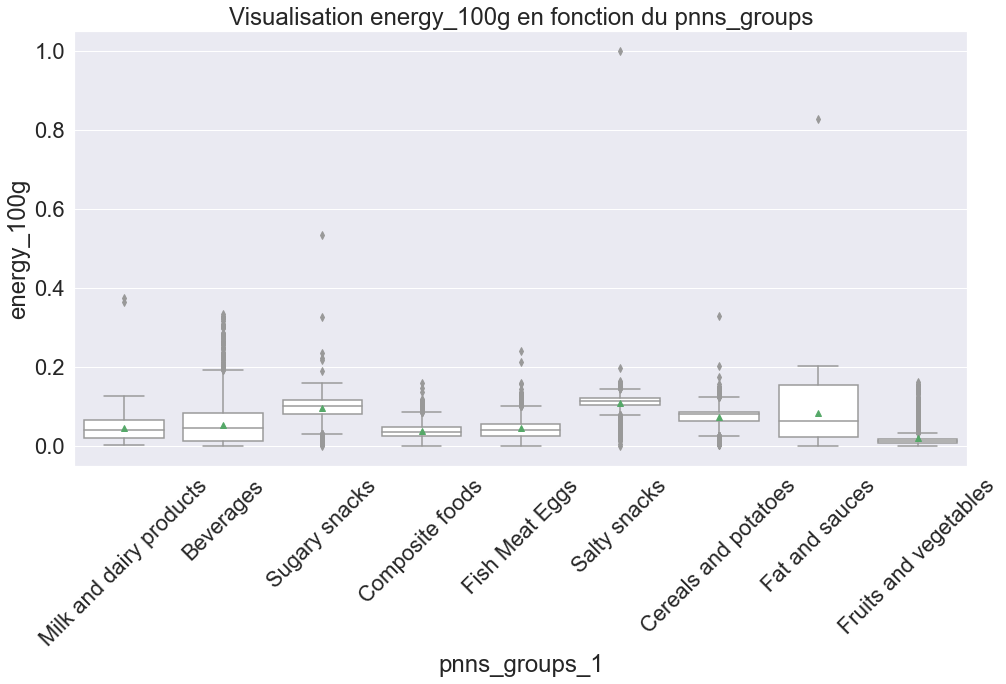

In [34]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="energy_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation energy_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Carbohydrates_100g
### Nutriscore

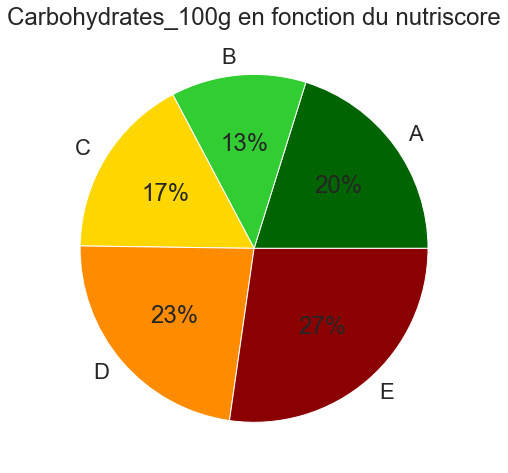

In [35]:
# declaring data
data = df_gb['carbohydrates_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Carbohydrates_100g en fonction du nutriscore')  
# displaying chart
plt.show()

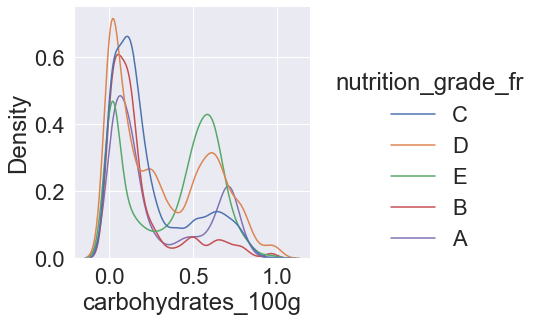

In [36]:
sns.displot(data=df, x="carbohydrates_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

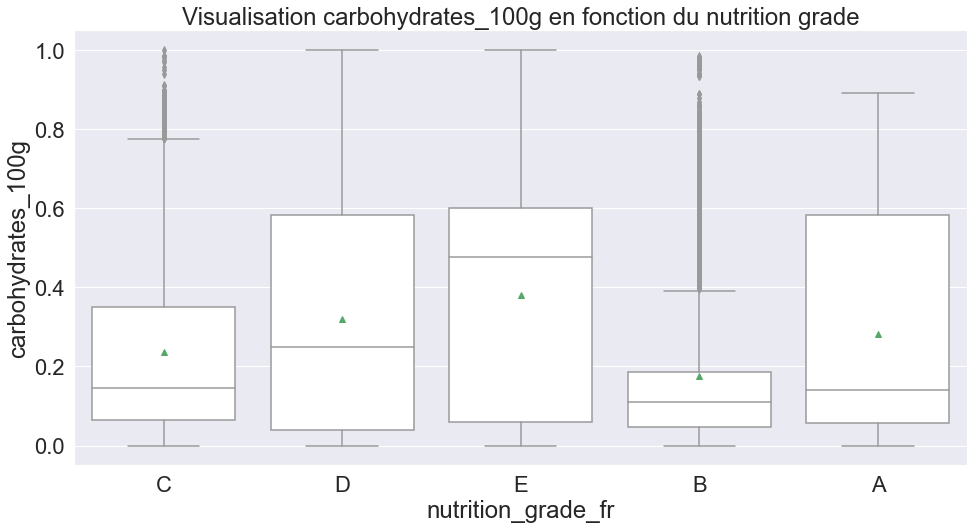

In [37]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="carbohydrates_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

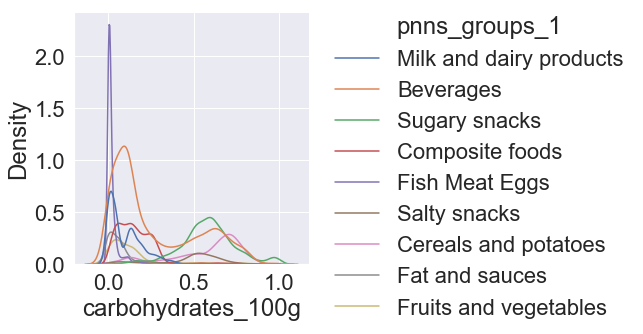

In [38]:
sns.displot(data=df, x="carbohydrates_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

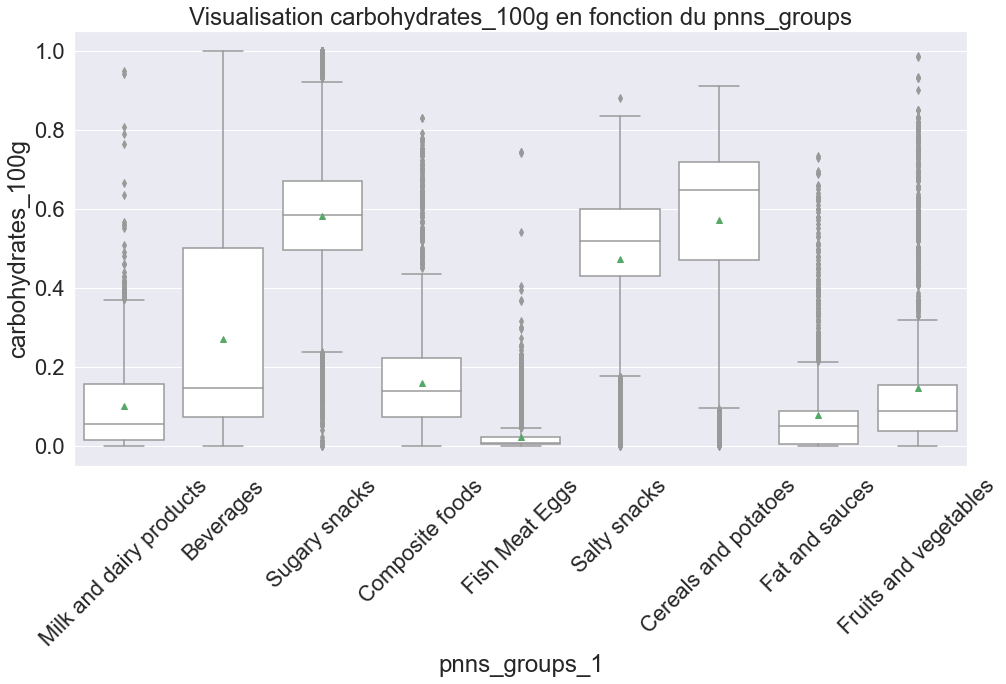

In [39]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="carbohydrates_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Saturated-fat_100g
### Nutriscore

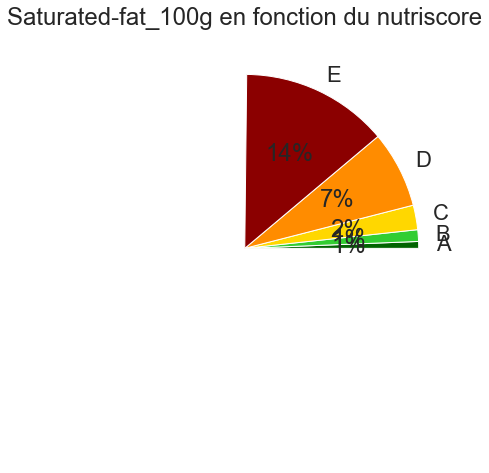

In [40]:
# declaring data
data = df_gb['saturated-fat_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Saturated-fat_100g en fonction du nutriscore')  
# displaying chart
plt.show()

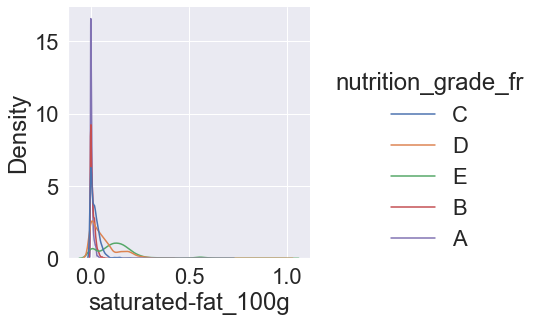

In [41]:
sns.displot(data=df, x="saturated-fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

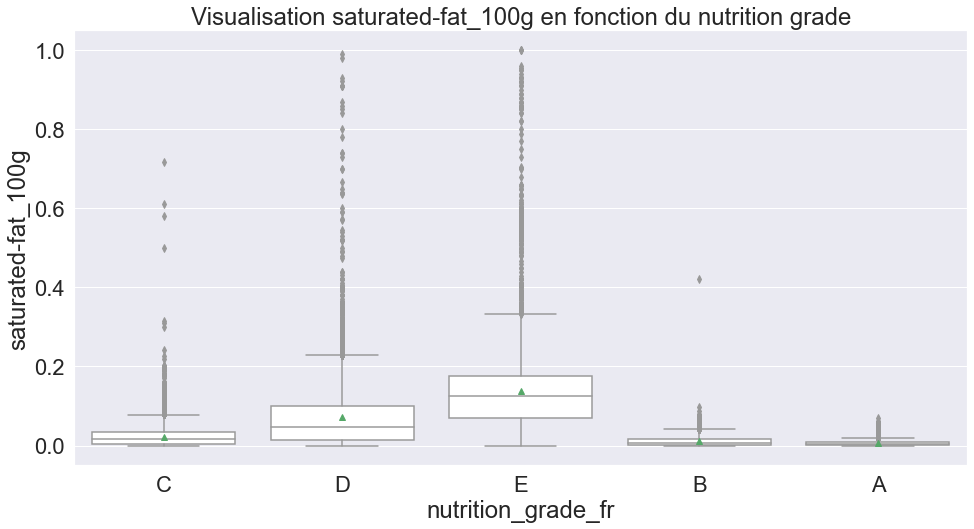

In [42]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="saturated-fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation saturated-fat_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

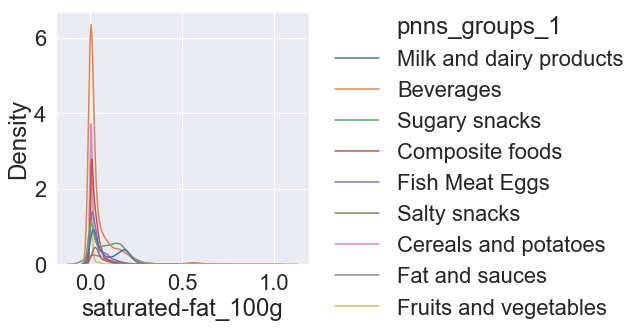

In [43]:
sns.displot(data=df, x="saturated-fat_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

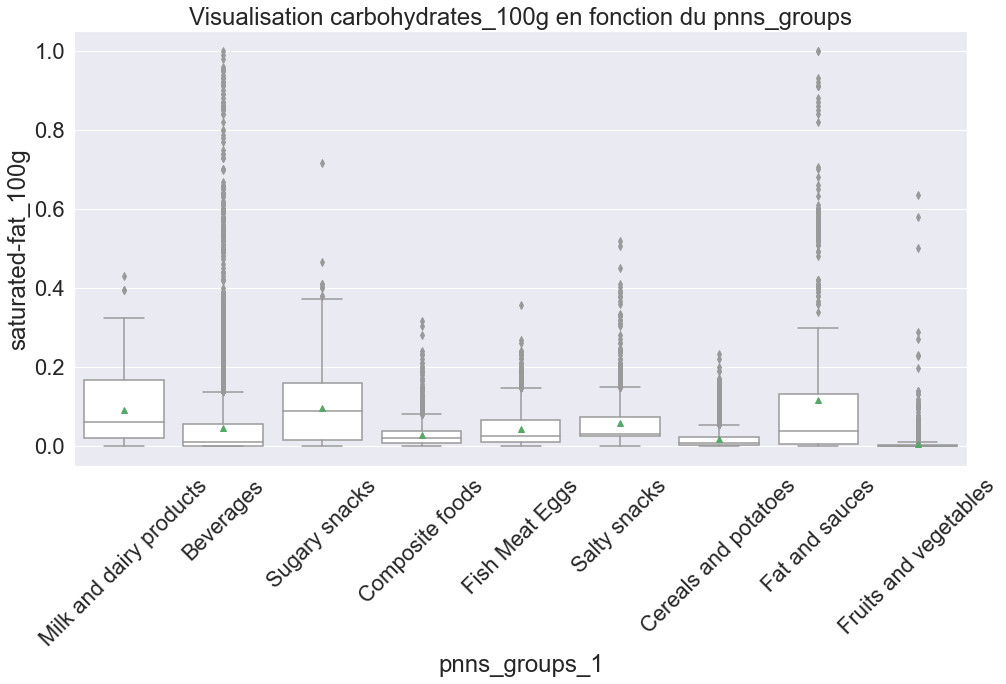

In [44]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="saturated-fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Fiber_100g 
### Nutriscore

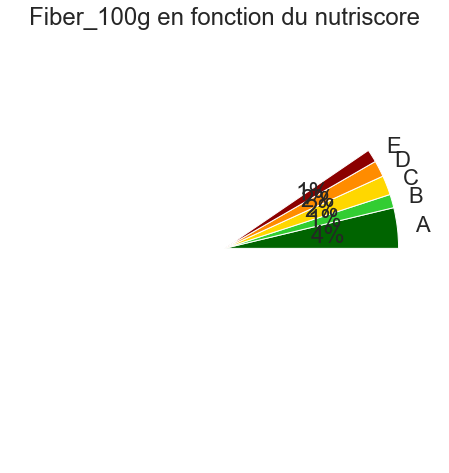

In [45]:
# declaring data
data = df_gb['fiber_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Fiber_100g en fonction du nutriscore')  
# displaying chart
plt.show()

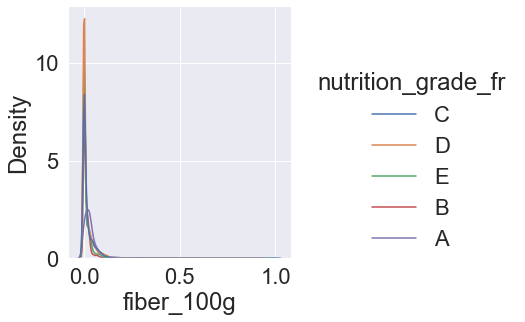

In [46]:
sns.displot(data=df, x="fiber_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

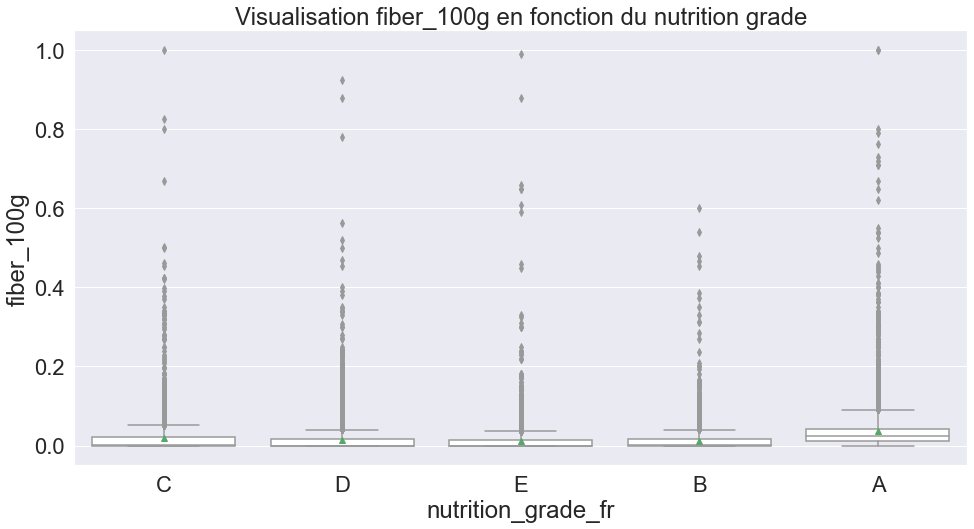

In [47]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fiber_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fiber_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

<Figure size 1152x576 with 0 Axes>

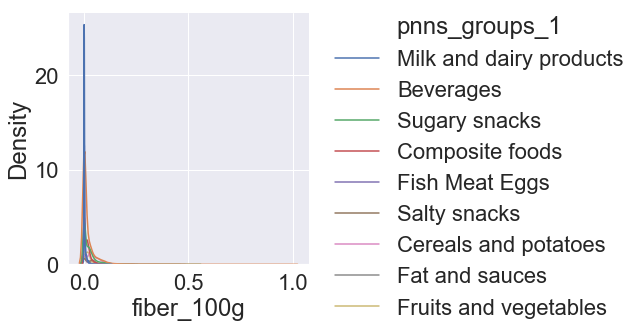

In [48]:
fig = plt.figure(figsize=[16, 8])
sns.displot(data=df, x="fiber_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

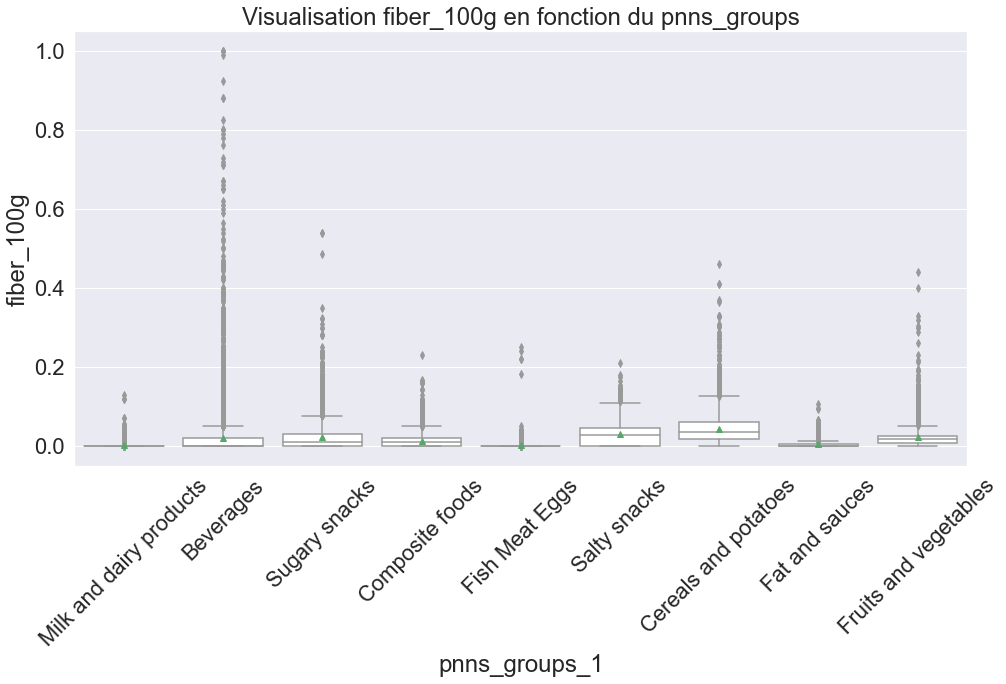

In [49]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="fiber_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fiber_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Proteins_100g  
### Nutriscore

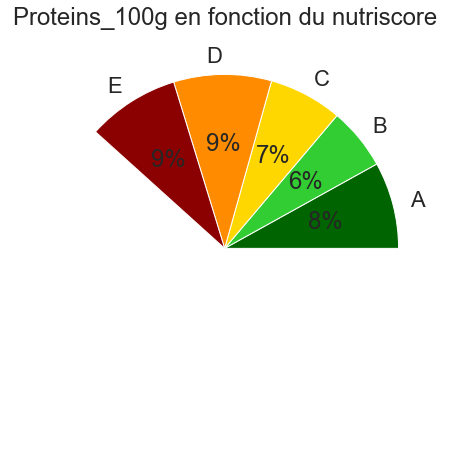

In [50]:
# declaring data
data = df_gb['proteins_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Proteins_100g en fonction du nutriscore')  
# displaying chart
plt.show()

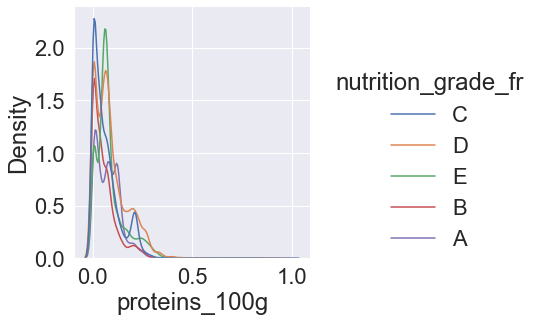

In [51]:
sns.displot(data=df, x="proteins_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

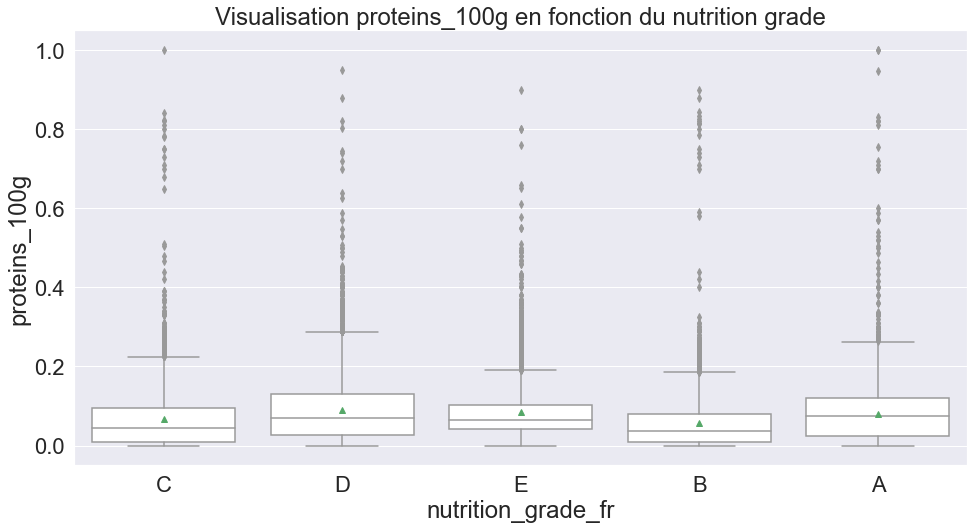

In [52]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="proteins_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation proteins_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

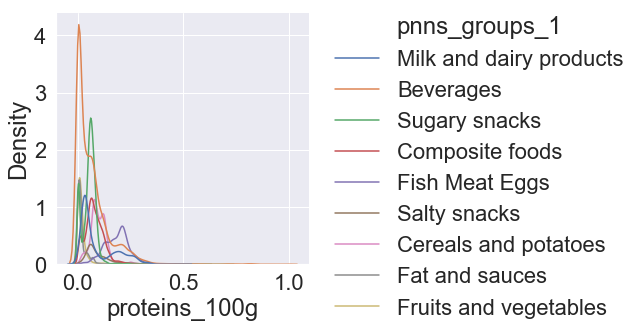

In [53]:
sns.displot(data=df, x="proteins_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

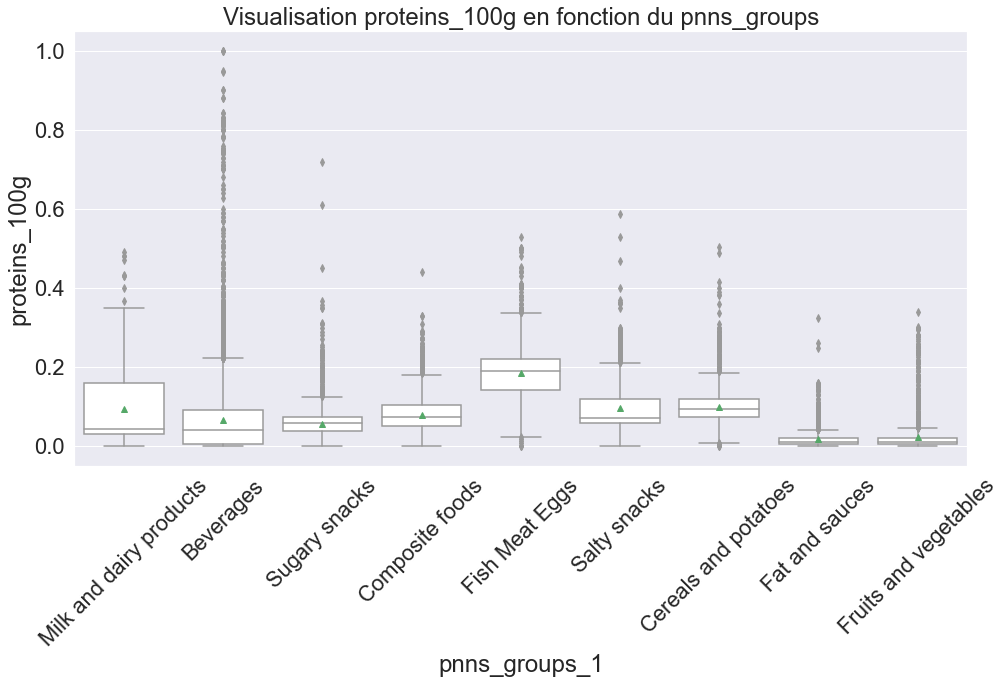

In [54]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="proteins_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation proteins_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## salt_100g 
### Nutriscore

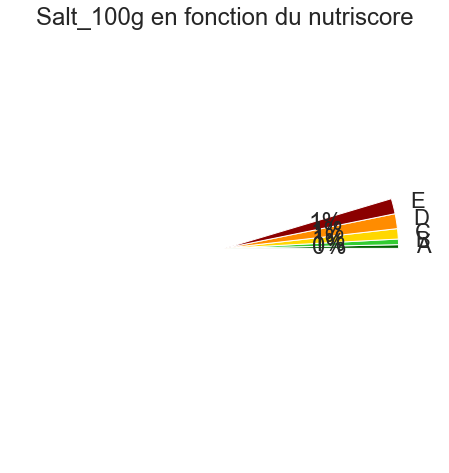

In [55]:
# declaring data
data = df_gb['salt_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Salt_100g en fonction du nutriscore')  
# displaying chart
plt.show()

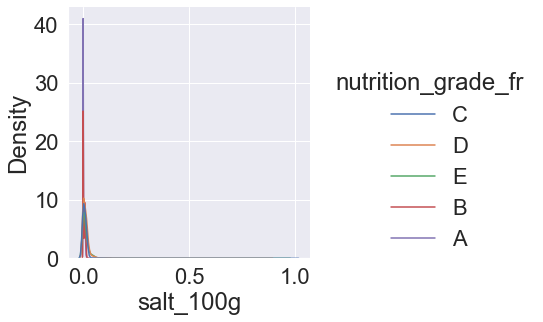

In [56]:
sns.displot(data=df, x="salt_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

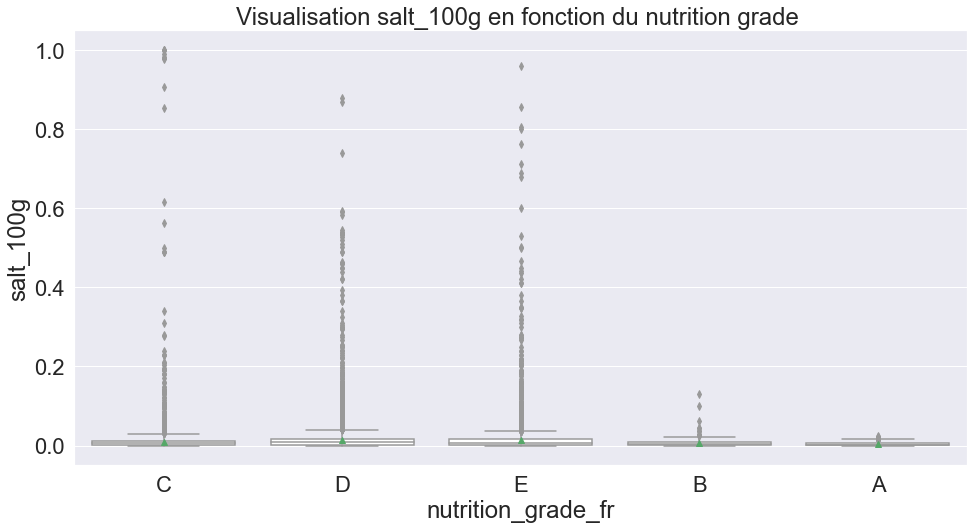

In [57]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="salt_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation salt_100g en fonction du nutrition grade ")
plt.show()

### Pnns Group

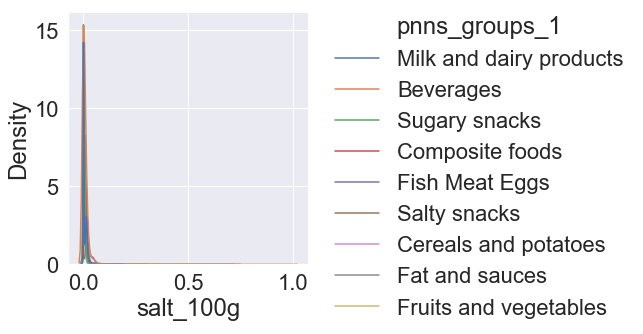

In [58]:
sns.displot(data=df, x="salt_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

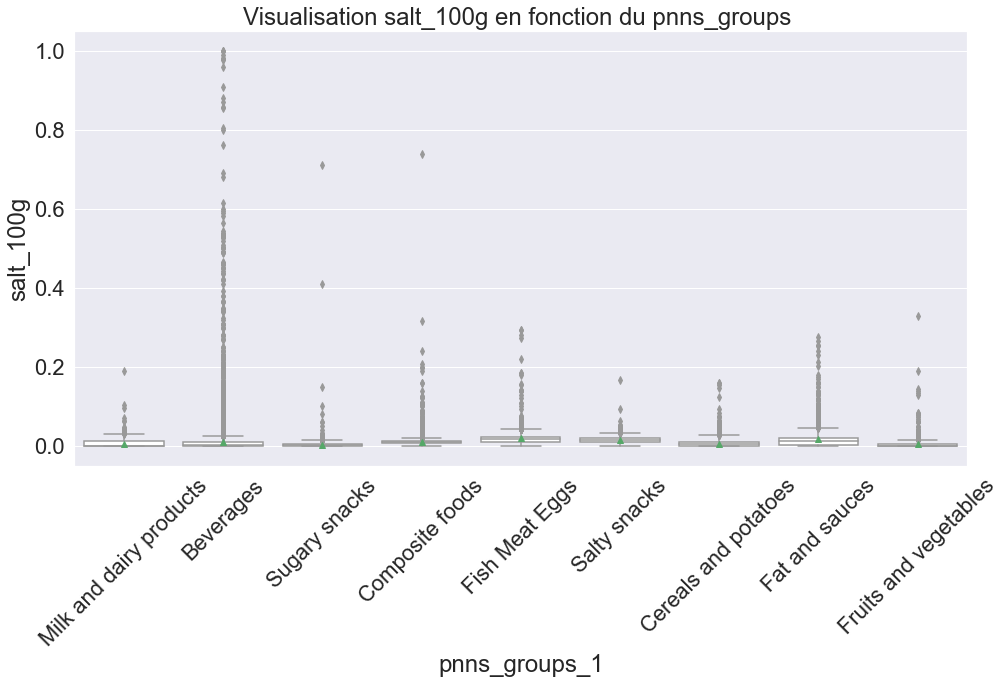

In [59]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="salt_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation salt_100g en fonction du pnns_groups ")
plt.xticks(rotation=45)
plt.show()

In [60]:
df

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
0         0.030     0.085000     0.025508            0.085000   
1         0.000     0.097000     0.009572            0.100000   
2         0.008     0.560000     0.073690            0.760000   
3         0.143     0.343000     0.087487            0.591000   
4         0.220     0.215667     0.096257            0.520000   
...         ...          ...          ...                 ...   
42109     0.076     0.008000     0.033209            0.133000   
42110     0.050     0.156333     0.070713            0.015000   
42111     0.004     0.002000     0.080428            0.804000   
42112     0.005     0.020000     0.052567            0.108333   
42113     0.000     0.084000     0.009840            0.108000   

       saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                0.020000       0.000          0.130   0.020000   
1                0.000000       0.000          0.005   0.000300   
2                0.001000       0.048          0.008   0.000500   
3                0.062000       0.026          0.055   0.005300   
4                0.056000       0.000          0.060   0.018400   
...                   ...         ...            ...        ...   
42109            0.023000       0.000          0.067   0.008800   
42110            0.125333       0.000          0.110   0.010267   
42111            0.001000       0.010          0.067   0.000130   
42112            0.000000       0.540          0.030   0.001778   
42113            0.000000       0.000          0.000   0.000400   

                 pnns_groups_1  \
0      Milk and dairy products   
1                    Beverages   
2                Sugary snacks   
3                Sugary snacks   
4                Sugary snacks   
...                        ...   
42109          Composite foods   
42110                Beverages   
42111     Cereals and potatoes   
42112            Sugary snacks   
42113                Beverages   

                                            product_name nutrition_grade_fr  
0        Bridelight 3% Les carrés fondants goût Emmental                  C  
1                                    100 % Pur Jus Pomme                  C  
2                                      18 marrons glacés                  C  
3                        6 carrés fourrés, saveur amande                  D  
4                                    Barre marbrée cacao                  E  
...                                                  ...                ...  
42109                                   Плов со свининой                  B  
42110                                        גבינת קוטג'                  E  
42111                                                寿司米                  A  
42112                                                 쌀떡                  A  
42113                                              칠성사이다                  D  

[42114 rows x 11 columns]

In [61]:
pnns_group_1 = df["pnns_groups_1"].unique()

In [62]:
# Diagramme en tuyaux d'orgues pour le nutriscore
def show_nutriscores_bar(grades, xlabel="Nutriscore"):
    sorted_grades = grades.value_counts(normalize=True, sort=False)
    for grade in df['nutrition_grade_fr']:
        if not grade in sorted_grades.keys():
            sorted_grades[grade] = 0
    sorted_grades = sorted_grades.sort_index(ascending=True)
    plt.figure(figsize=[16, 8])
    sorted_grades.plot(kind='bar', color=colors)
    plt.xlabel(xlabel)
    plt.show()

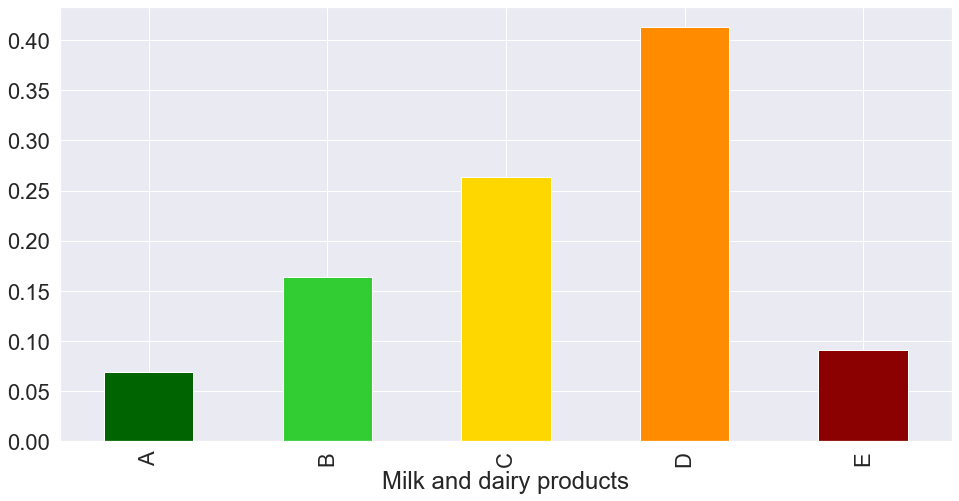

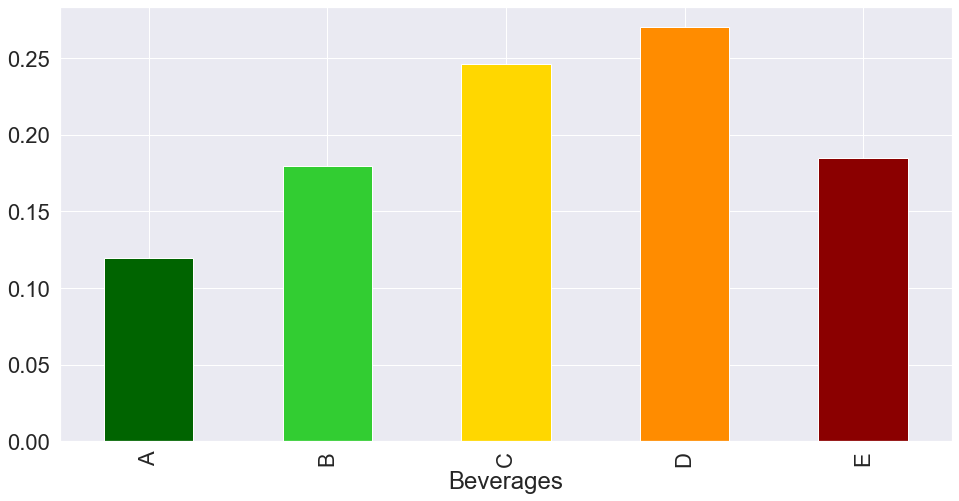

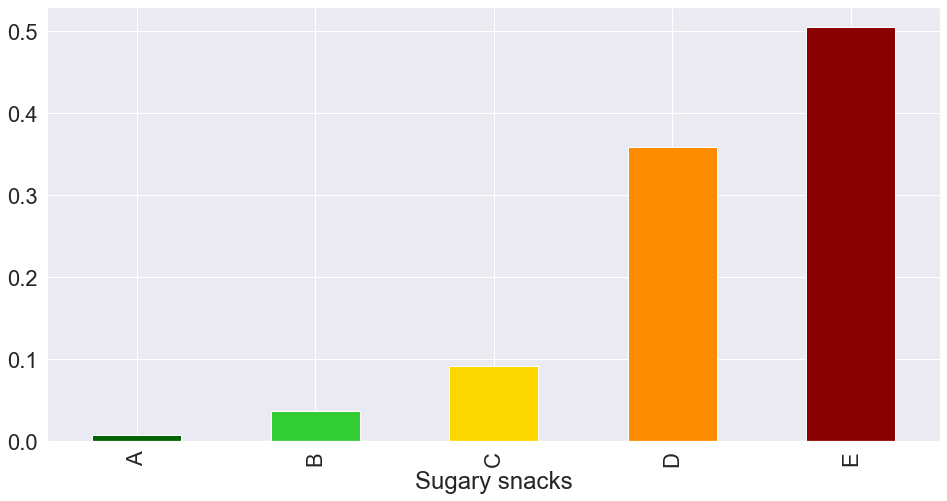

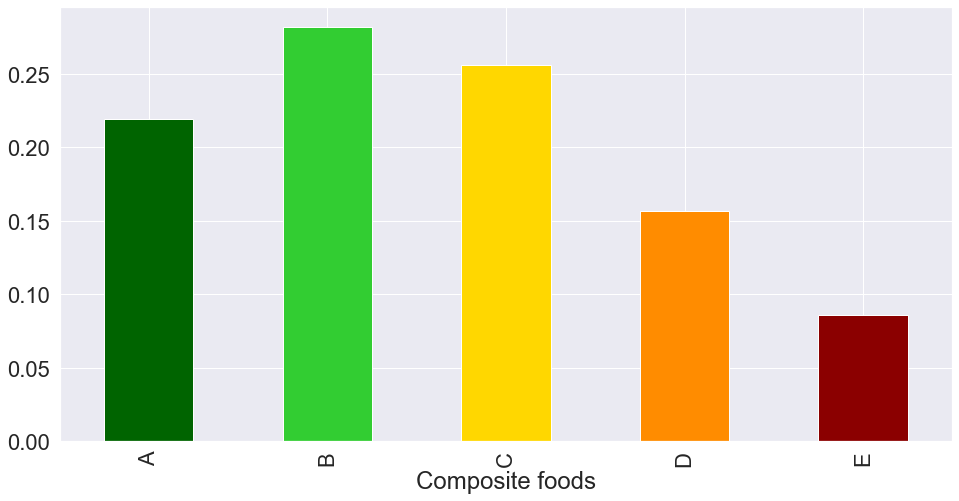

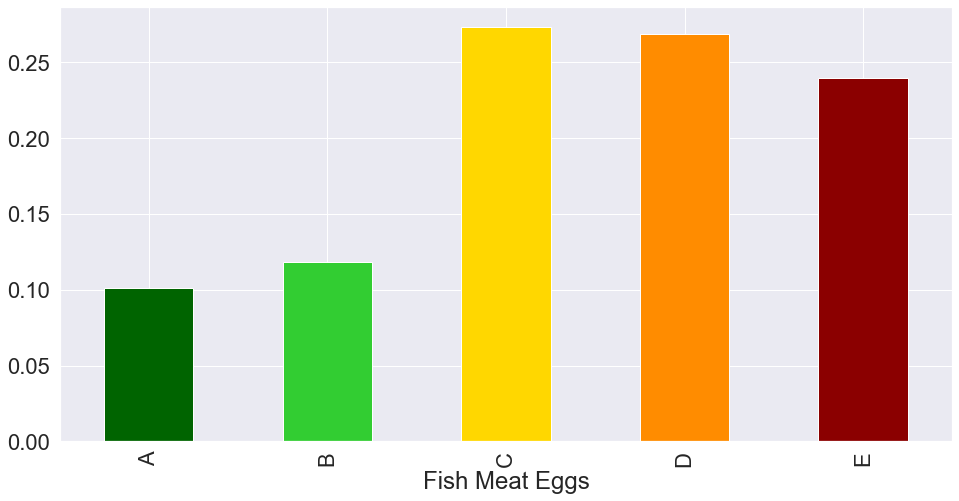

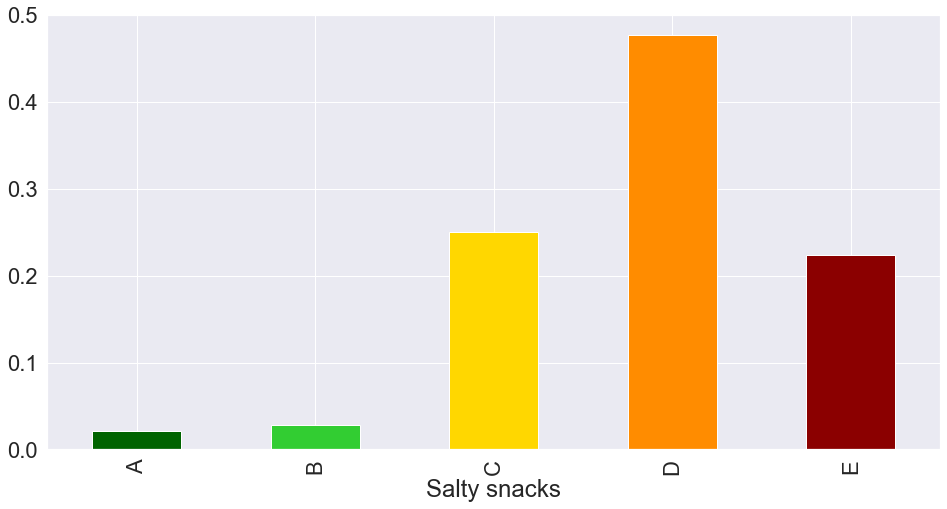

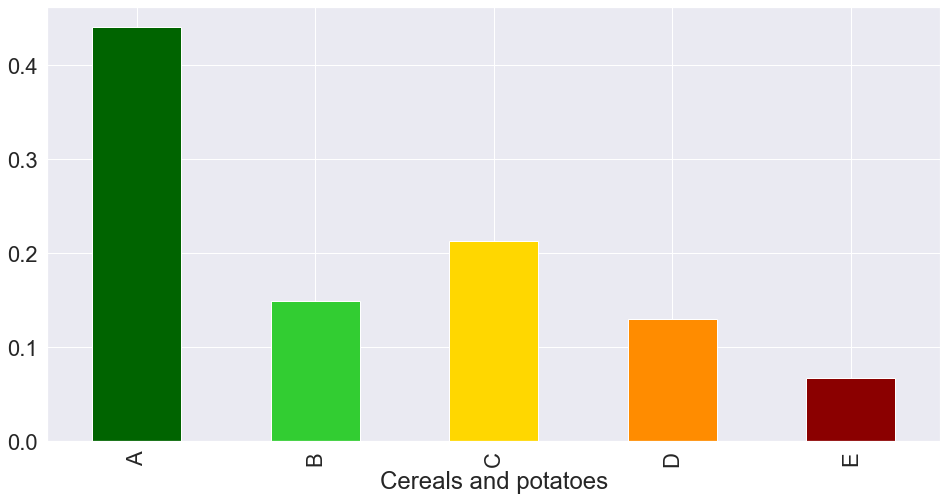

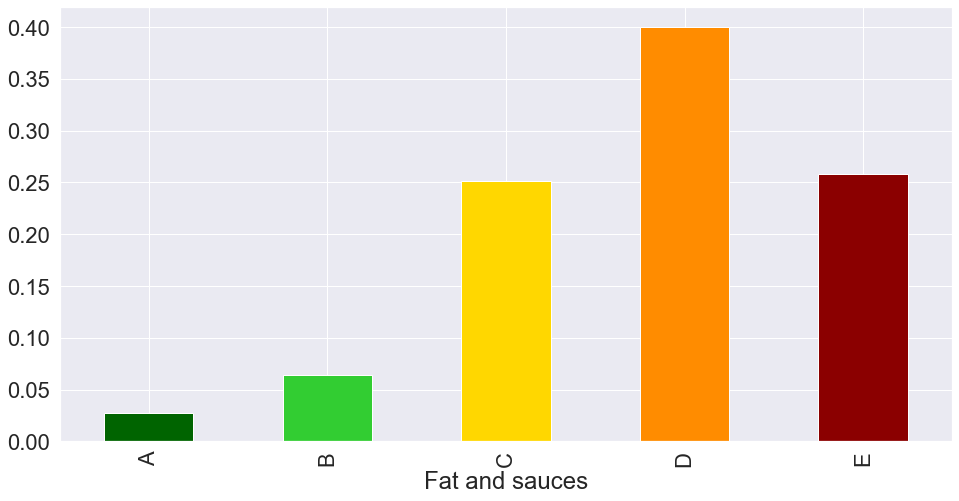

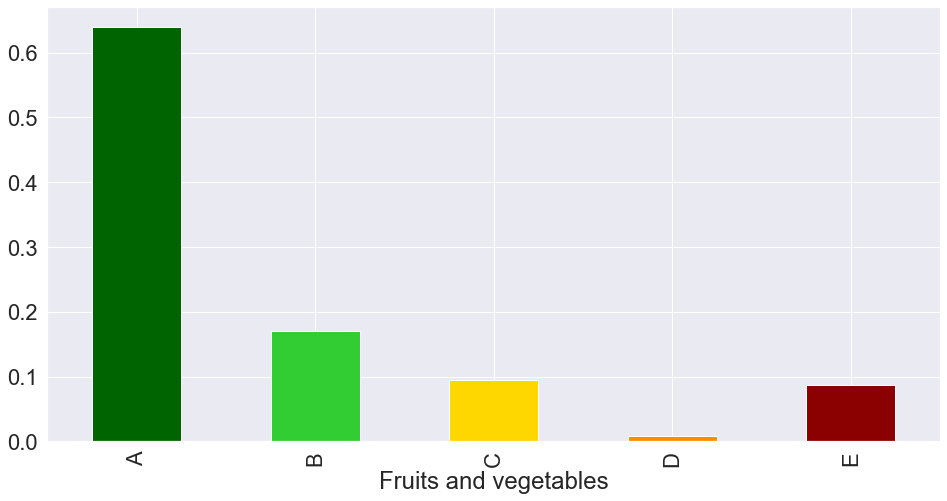

In [63]:
# puis on affiche les barplot pour chaque catégorie
for pnns_group in pnns_group_1:
    show_nutriscores_bar(df[df["pnns_groups_1"] == pnns_group]["nutrition_grade_fr"], pnns_group)

In [64]:
df = df[['product_name','fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g','nutrition_grade_fr']]

# Standardisation

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm = df_norm.select_dtypes('float')
df_norm = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns)
df_norm.head()

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  saturated-fat_100g  \
0 -0.624325    -0.265967    -0.813096           -0.754350           -0.412191   
1 -0.819683    -0.201617    -1.191042           -0.698178           -0.647613   
2 -0.767587     2.281225     0.329622            1.773418           -0.635842   
3  0.111521     1.117561     0.656837            1.140540            0.082197   
4  0.612939     0.434734     0.864835            0.874656            0.011570   

   fiber_100g  proteins_100g  salt_100g  
0   -0.455281       0.665442   0.335431  
1   -0.455281      -0.943376  -0.328212  
2    0.745968      -0.904765  -0.321462  
3    0.195395      -0.299849  -0.159775  
4   -0.455281      -0.235496   0.281531

fat_100g


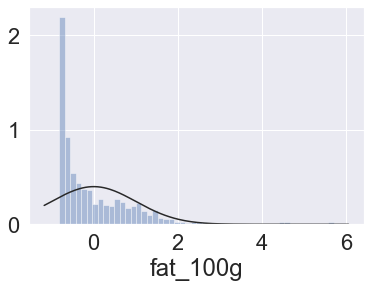

sugars_100g


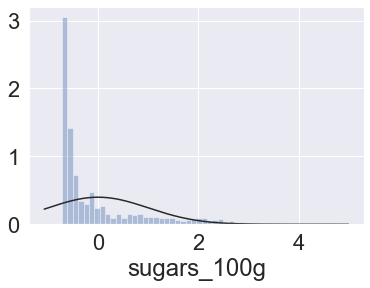

energy_100g


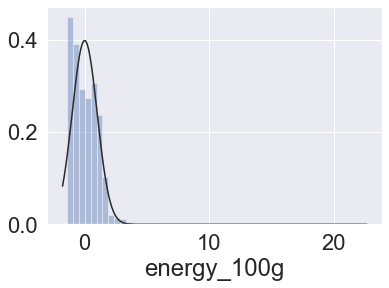

carbohydrates_100g


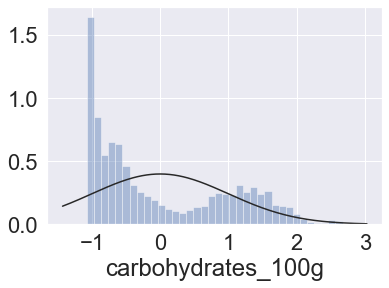

saturated-fat_100g


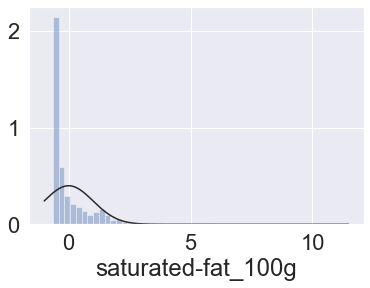

fiber_100g


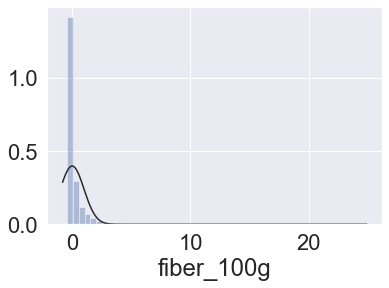

proteins_100g


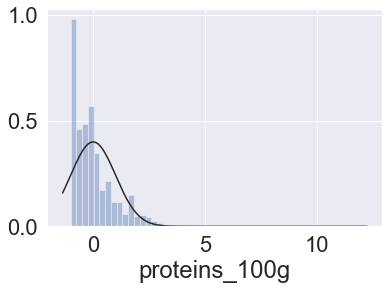

salt_100g


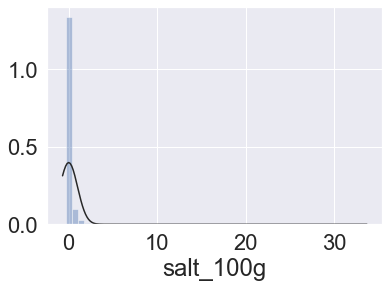

In [67]:
# verification de la distribution gausienne, test de normalité
for col in df_norm.select_dtypes('number'):
    plt.figure()
    sns.distplot(df_norm[col], fit=norm, kde=False)
    print(col)
    plt.show()

fat_100g


<Figure size 432x288 with 0 Axes>

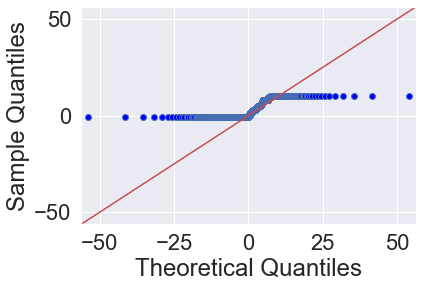

sugars_100g


<Figure size 432x288 with 0 Axes>

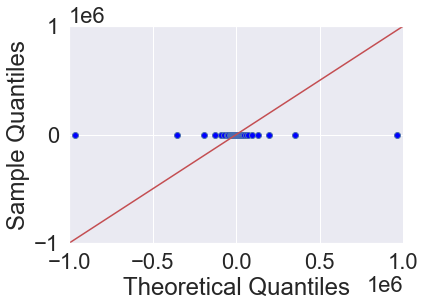

energy_100g


<Figure size 432x288 with 0 Axes>

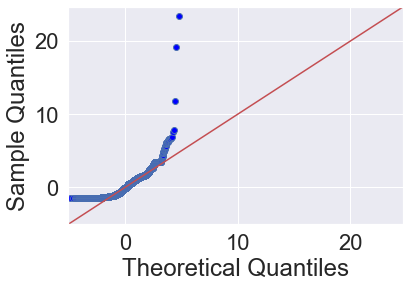

carbohydrates_100g


<Figure size 432x288 with 0 Axes>

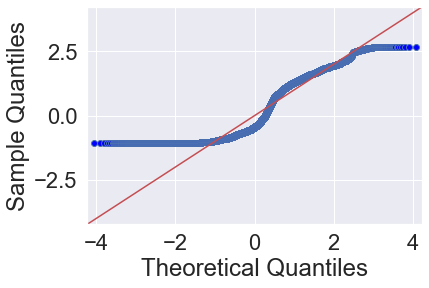

saturated-fat_100g


<Figure size 432x288 with 0 Axes>

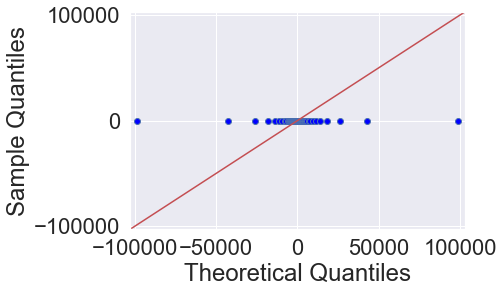

fiber_100g


<Figure size 432x288 with 0 Axes>

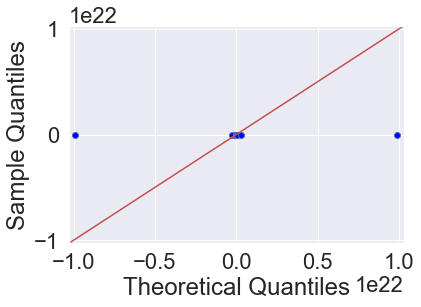

proteins_100g


<Figure size 432x288 with 0 Axes>

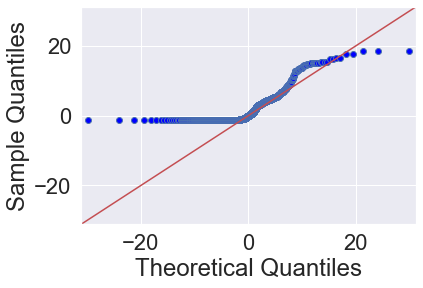

salt_100g


<Figure size 432x288 with 0 Axes>

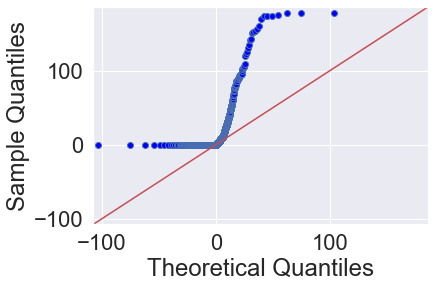

In [68]:
for col in df_norm:
    plt.figure()
    sm.qqplot(df_norm[col], st.t, fit=True, line="45")
    print(col)
    plt.show()

# Tests d'hypothèses 

Nous utiliserons la statistique inférentielle pour interpreter nos données afin d'aquérir une meilleure connaissance

Les tests parametriques :

ANOVA : Comparaison de plusieurs moyennes

Test parametrique ANOVA (puissant pour savoir si nous pouvons oui ou non rejeter H0)

In [69]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [70]:
df_nutri_grade = df['nutrition_grade_fr']

In [71]:
df_test = pd.concat([df_norm, df_nutri_grade], axis=1)

In [72]:
df_test

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
0     -0.624325    -0.265967    -0.813096           -0.754350   
1     -0.819683    -0.201617    -1.191042           -0.698178   
2     -0.767587     2.281225     0.329622            1.773418   
3      0.111521     1.117561     0.656837            1.140540   
4      0.612939     0.434734     0.864835            0.874656   
...         ...          ...          ...                 ...   
42109 -0.324777    -0.678880    -0.630464           -0.574598   
42110 -0.494087     0.116559     0.259021           -1.016489   
42111 -0.793635    -0.711055     0.489425            1.938191   
42112 -0.787123    -0.614530    -0.171348           -0.666971   
42113 -0.819683    -0.271329    -1.184701           -0.668219   

       saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
0               -0.412191   -0.455281       0.665442   0.335431   
1               -0.647613   -0.455281      -0.943376  -0.328212   
2               -0.635842    0.745968      -0.904765  -0.321462   
3                0.082197    0.195395      -0.299849  -0.159775   
4                0.011570   -0.455281      -0.235496   0.281531   
...                   ...         ...            ...        ...   
42109           -0.376877   -0.455281      -0.145402  -0.041869   
42110            0.827702   -0.455281       0.408031   0.007540   
42111           -0.635842   -0.205021      -0.145402  -0.333937   
42112           -0.647613   13.058767      -0.621613  -0.278422   
42113           -0.647613   -0.455281      -1.007729  -0.324843   

      nutrition_grade_fr  
0                      C  
1                      C  
2                      C  
3                      D  
4                      E  
...                  ...  
42109                  B  
42110                  E  
42111                  A  
42112                  A  
42113                  D  

[42114 rows x 9 columns]

#### Les variables energy_100g d'un produit et le nutriscore

In [73]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables energy_100g d'un produit et le nutriscore obtenu sont indépendantes
# Ha: l'hypothèse alternative: Les variables energy_100g d'un produit et le nutriscore obtenu sont corrélées

In [74]:
linear_model = ols('energy_100g ~ C(nutrition_grade_fr)', data=df_test).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

                             sum_sq       df            F  PR(>F)
C(nutrition_grade_fr)  13404.491957      4.0  4915.181331     0.0
Residual               28709.508043  42109.0          NaN     NaN


In [75]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

Ici la p-value est égale à 0.0


In [76]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

On rejette H0 : il y a une corrélation


In [77]:
#df.set_index('product_name',inplace=True)

# Analyse en Composantes Principales 

 l'ACP est une méthode statistique qui permet de représenter les données sur un graphique facilement interprétables.

In [78]:
from sklearn.decomposition import PCA
from sklearn import decomposition
from pyensae.graphhelper import Corrplot

## Diagramme éboulis des valeurs propres
Les pourcentages d’inertie nous donnent une information sur la « structure » de nos données.

Text(0.5, 1.0, 'Eboulis des valeurs propres')

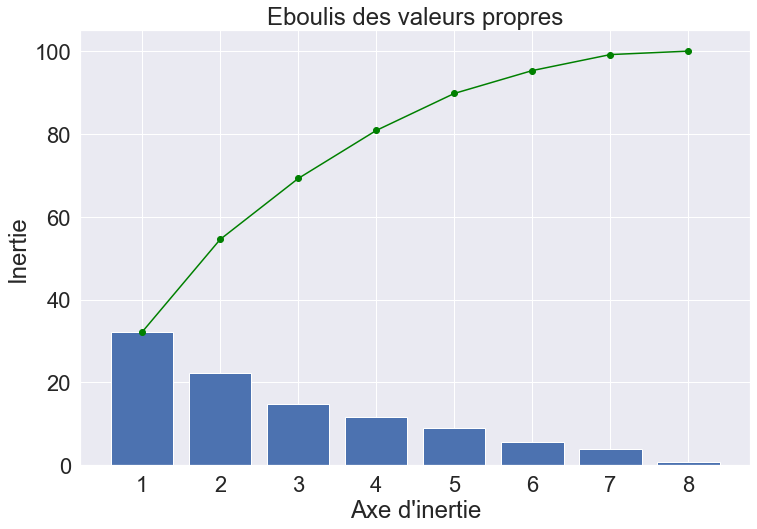

In [79]:
X = df.select_dtypes(include=['float64'])
X_scaled = scaler.fit_transform(X)

pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled) 

var_expl = pca.explained_variance_ratio_*100

plt.figure(figsize=(12,8))
plt.bar(np.arange(len(var_expl))+1, var_expl)
plt.plot(np.arange(len(var_expl))+1, var_expl.cumsum(),c="green",marker='o')
plt.xlabel("Axe d'inertie")
plt.ylabel("Inertie")
plt.title("Eboulis des valeurs propres")

In [80]:
pca = PCA(n_components=4)
Principal_components=pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2','PC 3', 'PC 4'])
print(pca_df)

           PC 1      PC 2      PC 3      PC 4
0     -1.249825  0.669825  0.211536  0.267949
1     -1.852882 -0.293638 -0.733824 -0.025722
2      0.600202 -3.173475  0.441334  0.188496
3      1.086172 -1.385953  0.048882  0.151269
4      1.097282 -0.541362 -0.244610  0.612345
...         ...       ...       ...       ...
42109 -1.132450  0.490672 -0.315092 -0.008801
42110  0.007014  0.775687 -0.438081  0.100341
42111 -0.076340 -1.229747  0.478717 -0.174611
42112  0.625090 -1.444731  8.527751 -5.723047
42113 -1.866179 -0.297249 -0.750059 -0.024895

[42114 rows x 4 columns]


In [81]:
for_visual = pd.concat([pca_df, df['nutrition_grade_fr']], axis = 1)
print(for_visual)

           PC 1      PC 2      PC 3      PC 4 nutrition_grade_fr
0     -1.249825  0.669825  0.211536  0.267949                  C
1     -1.852882 -0.293638 -0.733824 -0.025722                  C
2      0.600202 -3.173475  0.441334  0.188496                  C
3      1.086172 -1.385953  0.048882  0.151269                  D
4      1.097282 -0.541362 -0.244610  0.612345                  E
...         ...       ...       ...       ...                ...
42109 -1.132450  0.490672 -0.315092 -0.008801                  B
42110  0.007014  0.775687 -0.438081  0.100341                  E
42111 -0.076340 -1.229747  0.478717 -0.174611                  A
42112  0.625090 -1.444731  8.527751 -5.723047                  A
42113 -1.866179 -0.297249 -0.750059 -0.024895                  D

[42114 rows x 5 columns]


## Répresentation des individus

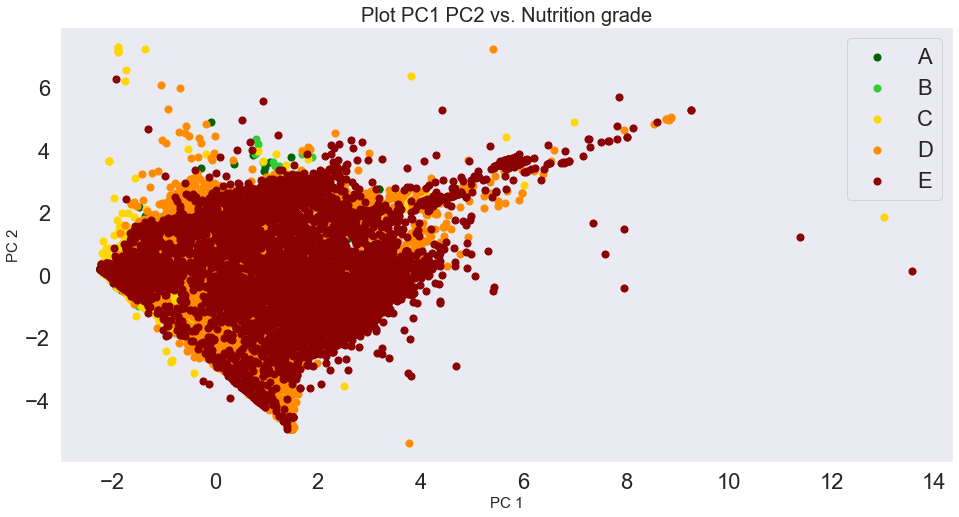

In [82]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot PC1 PC2 vs. Nutrition grade', fontsize = 20)
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
for nutrition_grade_fr, color in zip(nutrition_grade,colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(nutrition_grade)
ax.grid()

In [83]:
# import random
import random

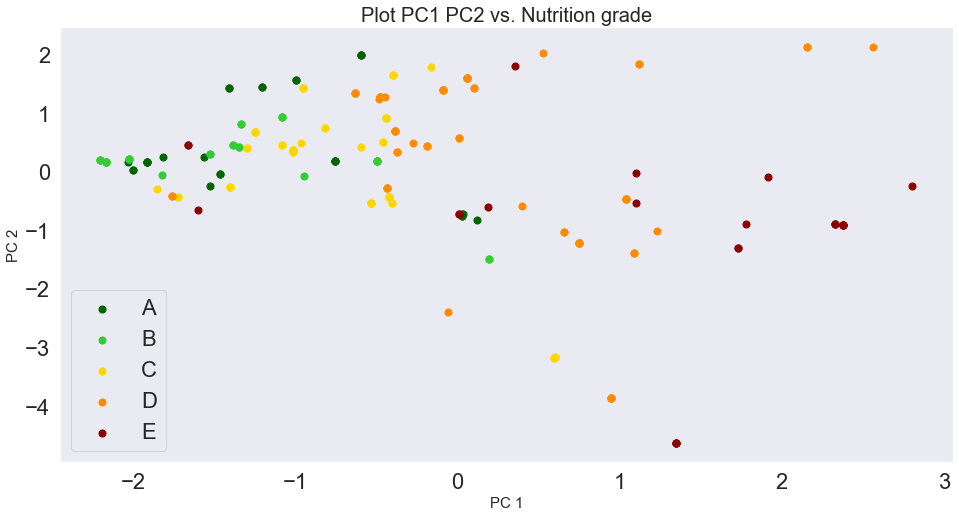

In [84]:
# Choose how many index include for random selection
random_raw = np.random.choice(100, replace=True, size=200)

for_visual_random = for_visual.iloc[random_raw]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 2', fontsize=15)
ax.set_title('Plot PC1 PC2 vs. Nutrition grade', fontsize=20)
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
for nutrition_grade_fr, color in zip(nutrition_grade, colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual_random.loc[indicesToKeep, 'PC 1'],
               for_visual_random.loc[indicesToKeep, 'PC 2'], c=color, s=50)
ax.legend(nutrition_grade)
ax.grid()

In [85]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.32173543 0.22359938 0.14713766 0.11596784]
Cumulative Prop. Variance Explained:  [0.32173543 0.54533481 0.69247248 0.80844031]


Les 4 premières composantes expliquent 83% de la variance totale des données. On peut donc dire que la dimension intrasèques de cet ensemble de données est raisonnablement égale à 4. Transformons donc la dataframe originelle en une dataframe de 4 variables

## Cercle des corrélations

In [86]:
 def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig=plt.figure(figsize=(10,16))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='#17aafa', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

In [87]:
features = X.columns
features

Index(['fat_100g', 'sugars_100g', 'energy_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'],
      dtype='object')

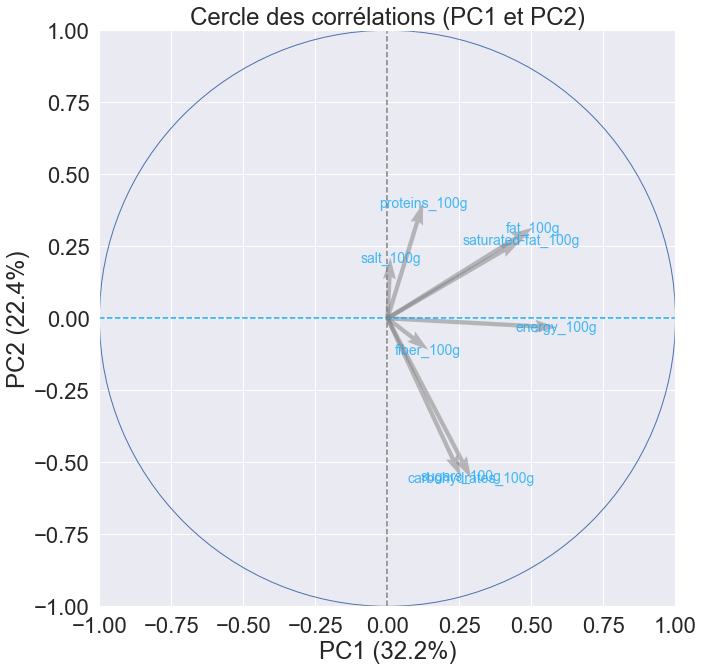

In [88]:
n_comp = 2
pcs = pca.components_
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))

* F1 : le gras (fat + saturated_fat) et le sel
* F2 : le sucre (sugars + carbohydrates)

In [89]:
couleurs = {'A': 'darkgreen', 'B': 'limegreen',
            'C': 'gold', 'D': 'darkorange', 'E': 'darkred'}

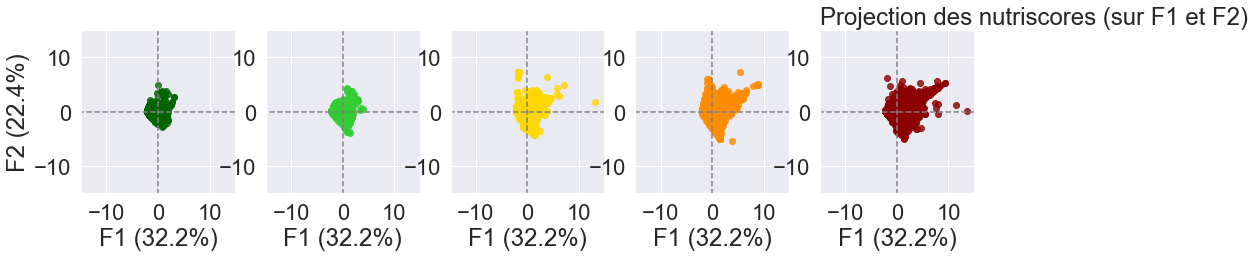

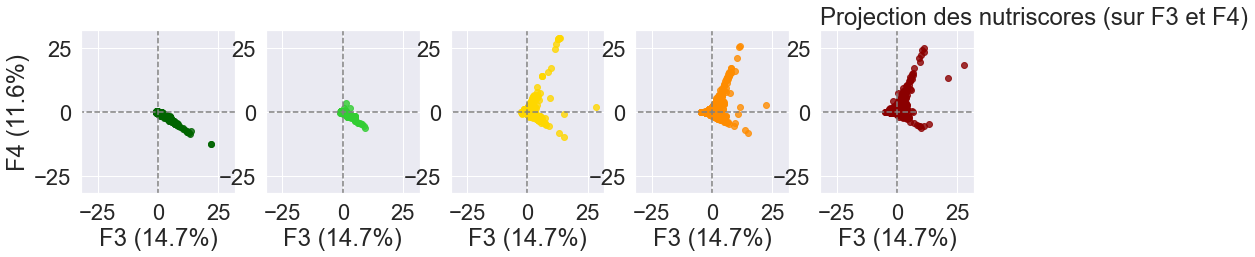

In [90]:
# Projection des individus
X_projected = pca.transform(X_scaled)
nutriscores = for_visual[for_visual['nutrition_grade_fr'].notna(
)]['nutrition_grade_fr']
for d1, d2 in [(0, 1), (2, 3)]:
    if d2 < 4:

        # initialisation de la figure
        fig = plt.figure(figsize=(16, 3))

        # affichage des points
        pos = 1
        for value in np.unique(nutriscores):
            selected = np.where(nutriscores == value)
            plt.subplot(1, 5, pos)
            plt.scatter(X_projected[selected, d1], X_projected[selected,
                        d2], alpha=0.8, label=value, c=couleurs[value])

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            if pos == 1:
                plt.ylabel('F{} ({}%)'.format(
                    d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))
            pos += 1

        plt.title("Projection des nutriscores (sur F{} et F{})".format(
            d1+1, d2+1), loc='left')
        plt.show()